# Time series analaysis with tensorflow 

__Time Series__ - data which is created over a period of time 
things to remember is how will you create a train, test and validation set for time series. 
- Splitting the traditional way (random shuffle of 70/15/15) can lead to incorrect splits.
- This is because, most of the time, you'll be wanting to use previous time series data to predict future time series data.

Two main __types__ of time series :
Univariate time series - time series of single entity 
Multivariate Time series -  time series of multiple entiites 

__Imputation__- you might also want to project back into the past to see how we got to where we are now or 
you might simply want to fill in holes in your data for what data doesn't already exist.

Application of machine learning in time series: 
1. Anomaly prediction — finding a sample which shouldn't have occurred in a series of other samples over time.
2. Forecasting — predicting future events based on past events.
3. Analyzing sequences to recognize what called them — predicting what word a soundwave produced based on the timesteps of the wave.

__Components__ of time series:
1. Trend: progession of time series 
2. Seasonality: repitative changes during a particular time period 
3. Autocorrelation: no trend or seasonality but they somewhat look like what  
4. Noise: the component which talks about uncertaininties happening due to some or other external component 

#### Types of time series based on the ocmponents(trend, seasonality, autocorrelatio and noise):
a. Non-stationary time series - 
trend, seasonality are visible upto a given period but then something happened and trend shifted the other way, and may leave the patterns which it previously followed 
- in such scenarios, more recent time stamps can be taken for having more acurate results instrad of considering the entire time series 

b. Stationary time series: 
behavious does not change over time. in this the more data you have will yield a better results 

In [169]:
import numpy as np 
import matplotlib.pyplot as plt 

In [170]:
def plot_Series (time, attribute, format='-'):
    plt.figure(figsize=(10,6))
    plt.plot(time, attribute, format)
    plt.xlabel('time')
    #plt.xticks(ticks=[365, 730, 1100, 1461], labels=[1,2,3,4])
    plt.ylabel('value')
    plt.grid("True")


In [171]:
def trend(time, slope =0):
    return slope*time 

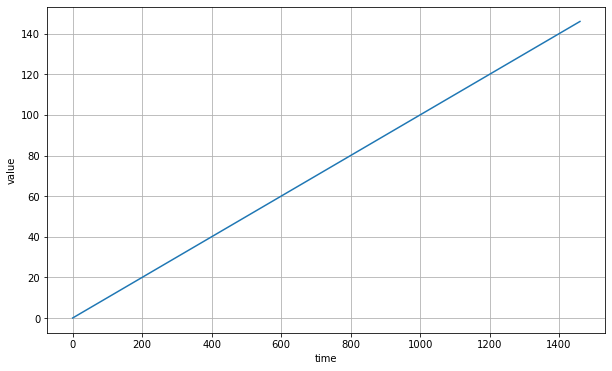

In [172]:
#making simple time series 
time = np.arange(4*365 + 1)
baseline = 10 
attribute = trend(time,0.1)
plot_Series(time, attribute)

In [173]:
#adding seasonal pattern 
def seasonal_pattern(season_time):
    return np.where (season_time < 0.4,
                    np.cos(season_time * 2*np.pi),
                    1/np.exp(3*season_time))
def seasonality (time, period, amplitude = 1 , phase = 0):
    season_time = ((time + phase) % period )/ period
    return amplitude * seasonal_pattern(season_time)
    

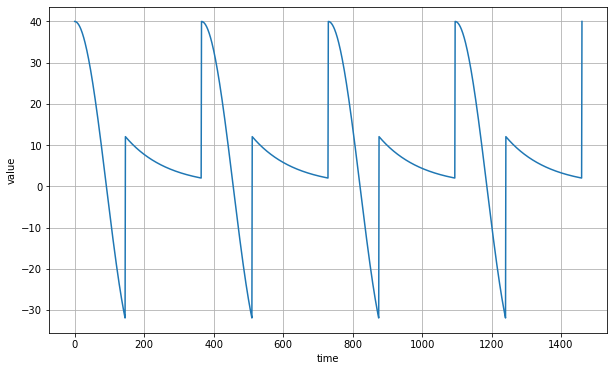

In [174]:
baseline = 10
amplitude = 40
series = seasonality(time , period =365 , amplitude = amplitude)
plot_Series(time , series)
plt.show()

In [175]:
series = seasonality(time , period =365 , amplitude = amplitude)
series

array([40.        , 39.99407357, 39.97629603, ...,  2.02448999,
        2.00791854, 40.        ])

In [176]:
np.shape(series)

(1461,)

In [177]:
365 * 4

1460

In [178]:
np.arange(4*365 + 1)

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [179]:
phase = 0
period = 365
season_time = ((time + phase) % period )/ period
season_time

array([0.        , 0.00273973, 0.00547945, ..., 0.99452055, 0.99726027,
       0.        ])

In [180]:
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [181]:
((time[130] + 0) % 365) / 365

0.3561643835616438

In [182]:
np.cos(0.3561643835616438 * 2*np.pi) *40

-24.74685613050012

In [183]:
slope = 0.05 
series = baseline + trend(time, slope) + seasonality(time , period = 365, amplitude=amplitude)
plot_Series(time , series)
plt.show()

In [184]:
def noise(time, noise_level = 1, seed = None ):
    rnd = np.random.RandomState(seed)
    return rnd.rand(len(time))* noise_level

In [185]:
len(np.arange(4*365 + 1))

1461

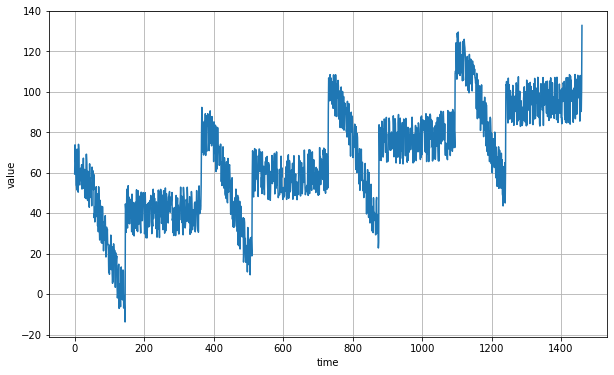

In [186]:
noise_level = 25
noisy_series = series + noise(time, noise_level , seed =42 )
plot_Series(time, noisy_series)
plt.show()

In [190]:
#adding autocorrelation 
def autocorrelation(time , amplitude , seed =None):
    rnd = np.random.RandomState(seed)
    a1 = 0.5 
    a2 = -0.1
    ar = rnd.randn(len(time) + 50)
    ar [:50] = 100
    for step in range(50 , len(time) + 50):
        ar[step] += a1 * ar[step-50]
        ar[step] += a2 * ar[step-33]
    return ar[50:] * amplitude

In [194]:
def autocorrelation(time , amplitude, seed = None):
    rnd = np.random.RandomState(seed)
    a = 0.8
    ar = rnd.randn(len(time) + 1)
    for step in range(1 , len(time) + 1):
        ar[step] += a * ar[step-1]
    
    return ar[1:]*amplitude 

In [195]:
plt.figure()
series = autocorrelation(time , 10 ,seed = 42)
plot_Series(time[:200], series[:200])
plt.show()

<Figure size 432x288 with 0 Axes>

In [196]:
#again add noise 
series =noise(time, seed =42)
plot_Series(time[:200], series[:200])
plt.show()

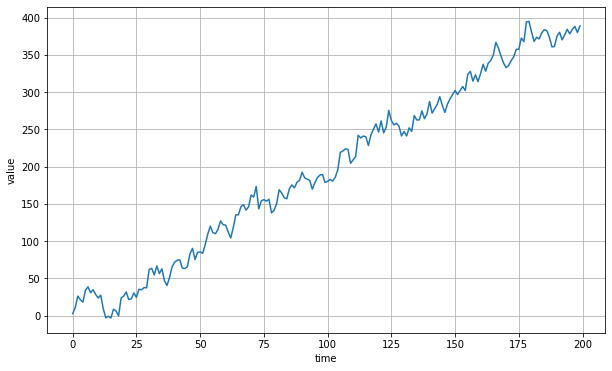

In [197]:
#then try another autocorrelation 
series = autocorrelation(time, 10, seed =42) + trend(time, 2)
plot_Series(time[:200], series[:200])
plt.show()

In [198]:
series =autocorrelation(time, 10, seed =42) + seasonality(time , period = 50 , amplitude=150)+trend(time, 2)
plot_Series(time[:200], series[:200])
plt.show()

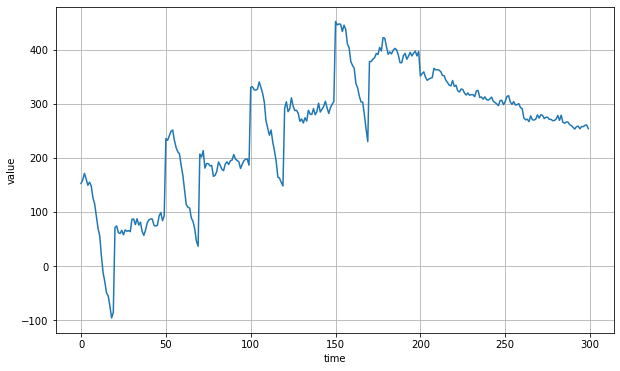

In [199]:
#let's make a non-stationary time series
series = autocorrelation(time , 10, seed =42)+seasonality(time , period = 50 , amplitude=150)+trend(time, 2)
series2 = autocorrelation(time , 5, seed =42)+seasonality(time , period = 50 , amplitude=2)+trend(time, -1) + 550
series[200:] =series2[200:]
plot_Series(time[:300], series[:300])
plt.show()

In [202]:
# adding impulses 
def impulses(time, num_impulses, amplitude =1, seed =None):
    rnd = np.random.RandomState(seed)
    impulses_indices = rnd.randint(len(time), size =10)
    series = np.zeros(len (time))
    for index in impulses_indices:
        series[index] += rnd.rand()*amplitude
    return series
    

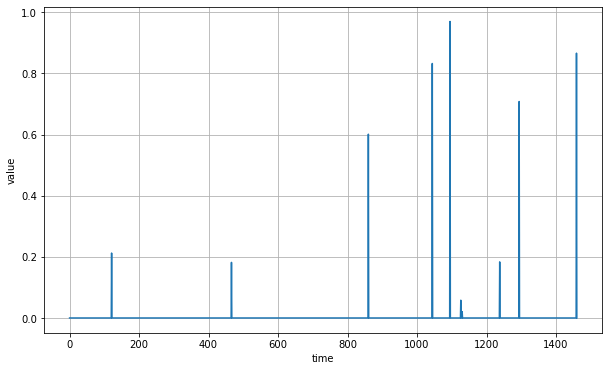

In [203]:
series = impulses(time, 10, seed =42)
plot_Series(time, series)
plt.show()

when I start adding some autocorrelations to this, then we'll see some of the behavior that we had discussed earlier where from our pulse we have a decay away from it but the decay could be interrupted by another pulse. This decay could be autocorrelated so that after the pulse it decays but then the decay autocorrelates. So we have these decreasing curves.

In [206]:
def autocorrelation(source, at):
    ar = source.copy()
    max_lag = len(at)
    for step, val in enumerate(source):
        for lag, a in at.items():
            if step - lag >0:
                ar[step] += a * ar[step-lag]
    
    return ar

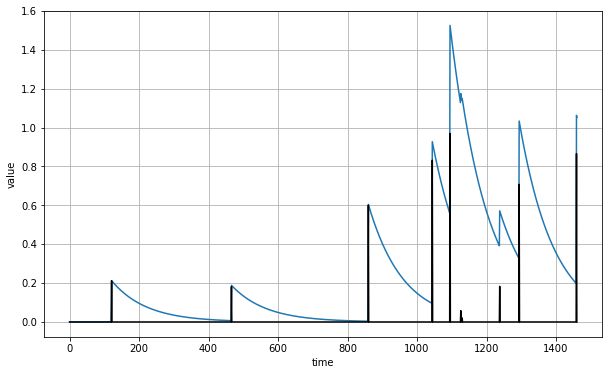

In [208]:
signal = impulses(time, 10 , seed =42)
series = autocorrelation(signal , {1:0.99})
plot_Series(time, series)
plt.plot(time, signal, "k-")
plt.show()

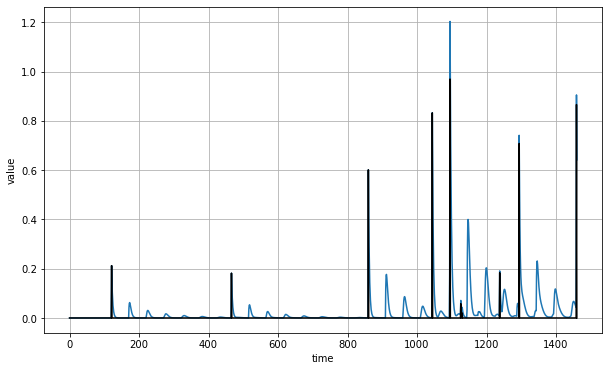

In [209]:
signal = impulses(time, 10 , seed =42)
series = autocorrelation(signal , {1:0.70, 50:0.20})
plot_Series(time, series)
plt.plot(time, signal, "k-")
plt.show()

- 🔑 If you're forecasting on time series data, you'll want to split your data into a training period (the first 70% of time steps), a validation period (the next 15% of the time steps) and a testing period (the final 15% of the time steps).

##### Fixed partitioning:

- You can then use these splits to train on past data and predict on new (the test set will be new to the model) data and then compare how your model's predictions compared to the actual events in the test data.
    - split data in a way such that equal proportions of seasons/time periods are included in train, test and validation set 
    
##### Roll forward partitioning: 
- Another option for creating train, valid and test splits for time series data is to use roll-forward partitioning. This involves:
    - Start training on the earliest data, gradually increasing as needed.
    - Your validation data are the most recent examples, where as, your test period are the timestamps happening now and into the future.
    - This means your model gets evaluating on a rolling basis as new data flows in.


Metrics to measure perforamce of forecasting models: 
- `errors = forecasts - actual`
- `mse = np.square(errors).mean()`
   - Squaring errors gets rid of negative errors.
- `rmse = np.sqrt(mse)`
   - Taking the square root gets the MSE into the same scale as your data.
- `mae = np.abs(errors).mean()`
- `mape = np.abs(errors/x_valid).mean()`
   - This gives an idea of the size of the error compared to the size of the values.
#### If large errors are worse than smaller errors, choose MSE but if your errors (large or small) are all the same, choose MAE.

Naive forecast:  take the last value and assume that the next value will be the same one, and this is called naive forecasting. 
Moving average: It involves taking a box of values (for example the pat 30 days) and using the mean of these values as the next time step prediction. This eliminates a lot of noise but does not include trend or seasonality.
#### moving average can be worse than the naive forecast becasue it does not considers the seasonality and noise components of time series

To avoid this, we have something called as 
Differencing
- remove trend and seasonality from time series 
- we study the difference between the value at time T and the value at an earlier period.
- apply moving average to this 
- add back the value at time T minus 365
- remove the past noise using a moving average on that

Start with a simple way to predict a time series, such as, moving average windows and differencing then see if machine learning can beat it.

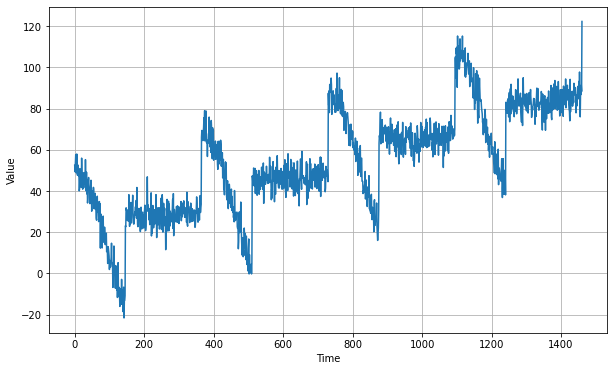

In [210]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

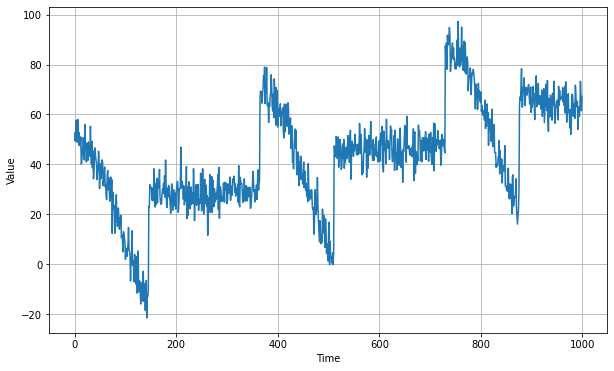

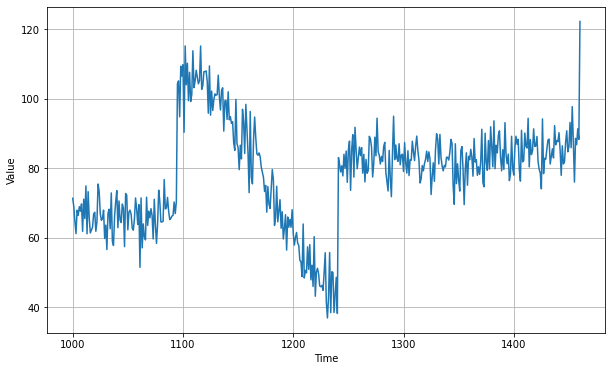

In [211]:
#splitting 
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

## Naive Forecast 

In [212]:
naive_forecast = series[split_time - 1:-1]

In [213]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

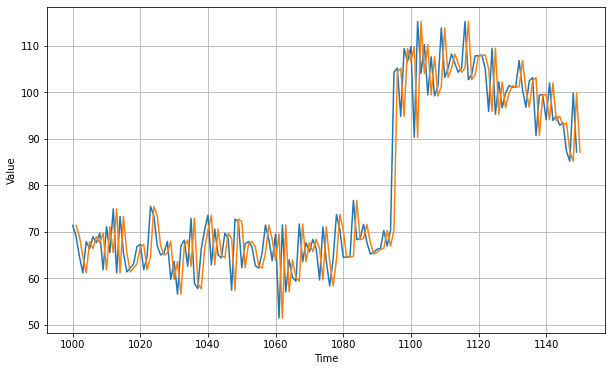

In [214]:
#zooming in 
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

You can see that the naive forecast lags 1 step behind the time series.

Now let's compute the mean squared error and the mean absolute error between the forecasts and the predictions in the validation period:



In [215]:
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

61.827534
5.937908


## Now Lets try Moving Average

In [217]:
def moving_average_forecast(series, window_size):
    """Forecasts the mean of the last few values.If window_size=1, then this is equivalent to naive forecast"""
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time:time + window_size].mean())
    return np.array(forecast)

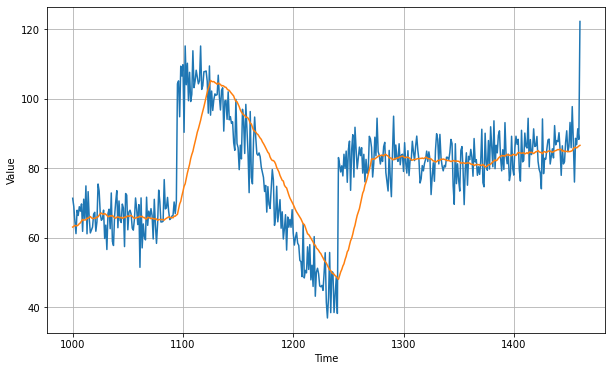

In [218]:
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [219]:
print(keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

106.674576
7.142419


That's worse than naive forecast! The moving average does not anticipate trend or seasonality, so let's try to remove them by using differencing. Since the seasonality period is 365 days, we will subtract the value at time t – 365 from the value at time t.


## Apply differencing 

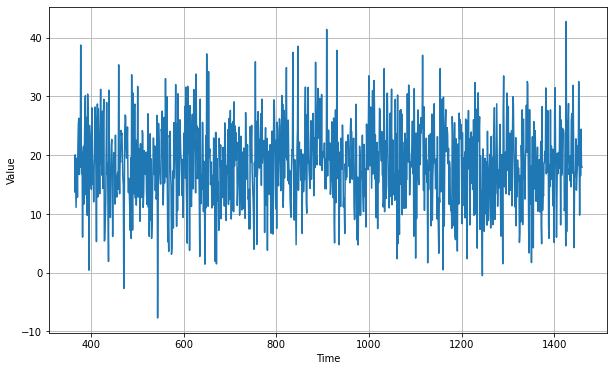

In [220]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

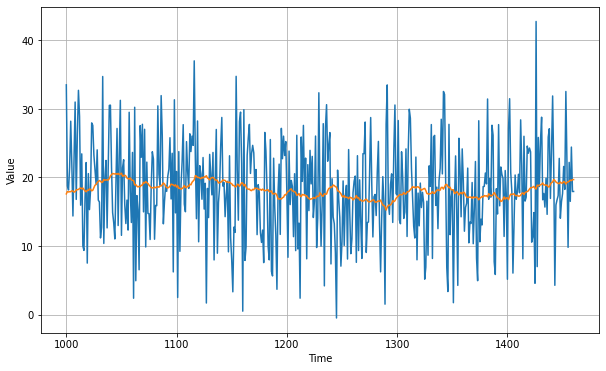

In [221]:
#Great, the trend and seasonality seem to be gone, so now we can use the moving average:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 365:])
plot_series(time_valid, diff_moving_avg)
plt.show()

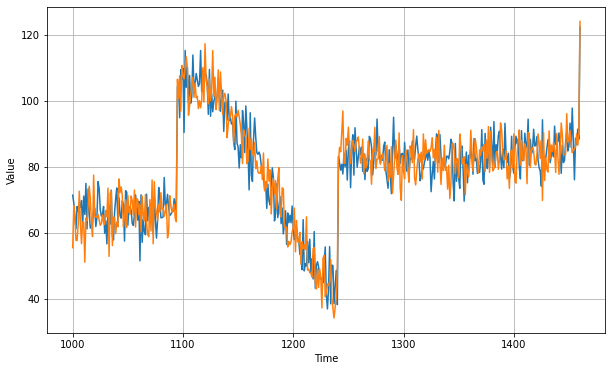

In [222]:
#Now let's bring back the trend and seasonality by adding the past values from t – 365:

diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [223]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

52.973663
5.839311


Better than naive forecast, good. However the forecasts look a bit too random, because we're just adding past values, which were noisy. Let's use a moving averaging on past values to remove some of the noise:

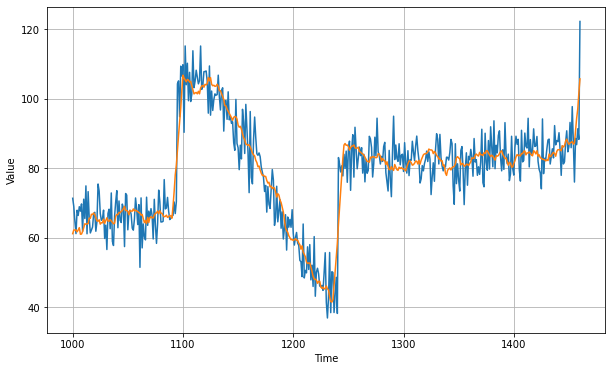

In [224]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [225]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

33.452263
4.569442


# Creating a simple DNN on time series 

In [41]:
#1. prepare the data 
import tensorflow as tf 

In [42]:
data = tf.data.Dataset.range(10)
for val in data:
    print(val.numpy())

0
1
2
3
4
5
6
7
8
9


In [44]:
dataset = data.window(5, shift =1, drop_remainder= True )
for item in dataset:
    for val in item:
        print(val)
        #print(val.numpy(),end = ' ')
    print()
    

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)

tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)

tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)

tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)

tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)

tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), 

In [282]:
#creating x's and y's 
dataset = dataset.flat_map(lambda window: window.batch(5))
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int64)
tf.Tensor([2 3 4 5 6], shape=(5,), dtype=int64)
tf.Tensor([3 4 5 6 7], shape=(5,), dtype=int64)
tf.Tensor([4 5 6 7 8], shape=(5,), dtype=int64)
tf.Tensor([5 6 7 8 9], shape=(5,), dtype=int64)


In [283]:
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x,y in dataset:
    print(x.numpy(), y.numpy())

[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


In [284]:
dataset = dataset.shuffle(buffer_size=10)
for x,y in dataset:
    print(x.numpy(), y.numpy())

[4 5 6 7] [8]
[2 3 4 5] [6]
[0 1 2 3] [4]
[1 2 3 4] [5]
[5 6 7 8] [9]
[3 4 5 6] [7]


In [287]:
dataset = dataset.batch(2).prefetch(1)
for x,y in dataset:
    print("x = ", x.numpy())
    print("y = ", y.numpy())

x =  [[1 2 3 4]
 [4 5 6 7]]
y =  [[5]
 [8]]
x =  [[2 3 4 5]
 [3 4 5 6]]
y =  [[6]
 [7]]
x =  [[5 6 7 8]
 [0 1 2 3]]
y =  [[9]
 [4]]


In [288]:
#this is how you create a sample data to feed it to a DNN 

In [289]:
#let's now look at how you will create a siimple DNN with just 1 layer

In [290]:
def plot_series(time, series, format ='-', start=0, end = None):
    plt.plot(time[start:end], series[start:end])
    plt.xlabel("time")
    plt.ylabel("value")
    plt.grid(True)
    

In [291]:
def trend(time, slope = 0):
    return slope*time


In [292]:
def seasonal_pattern(season_time):
    return np.where (season_time < 0.4, 
                    np.cos(season_time *2*np.pi), 
                    1/np.exp(3*season_time))
    

def seasonality(time, period, amplitude = 1 , phase =0):
        season_time = ((time + phase)%period) / period
        return amplitude * seasonal_pattern(season_time)

In [293]:
def noise(time, noise_level = 1, seed = None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time))*noise_level

In [294]:
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

In [295]:
# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

In [296]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [297]:
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [298]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [299]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(dataset)
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))
model.fit(dataset,epochs=100,verbose=0)

print("Layer weights {}".format(l0.get_weights()))

<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float32, tf.float32)>
Layer weights [array([[-0.02395084],
       [-0.00815476],
       [ 0.00434966],
       [ 0.00954589],
       [ 0.01714875],
       [ 0.00892035],
       [-0.03280055],
       [ 0.0625166 ],
       [ 0.02389536],
       [-0.04749119],
       [-0.11056863],
       [ 0.08738074],
       [ 0.0152765 ],
       [ 0.06627651],
       [-0.11149745],
       [ 0.13244423],
       [ 0.01006426],
       [ 0.24545531],
       [ 0.1742432 ],
       [ 0.4789107 ]], dtype=float32), array([0.01049459], dtype=float32)]


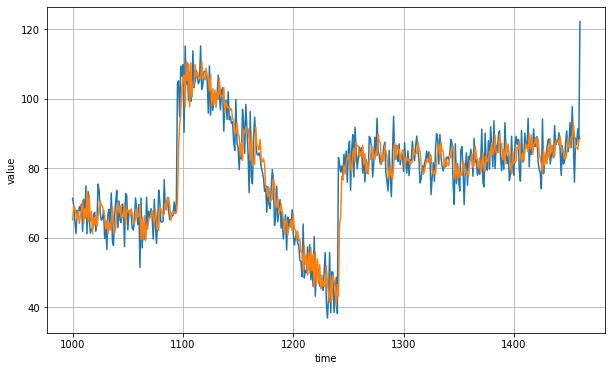

In [300]:
forecast = []

for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [301]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

5.064135

## 3 layers DNN 

In [302]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))
model.fit(dataset,epochs=100,verbose=0)

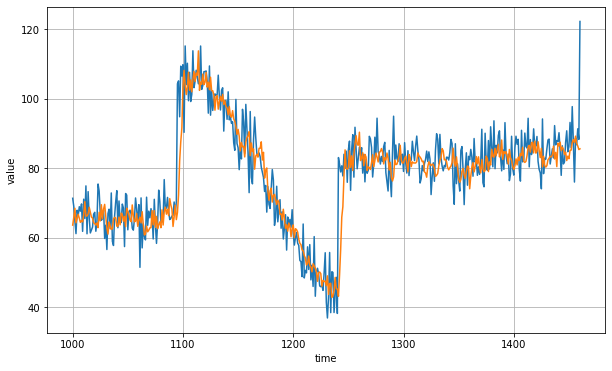

In [303]:
forecast = []
for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [304]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

5.073995

### using callbacks to adjust learning rates 

In [305]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule], verbose=0)

(1e-08, 0.001, 0.0, 300.0)

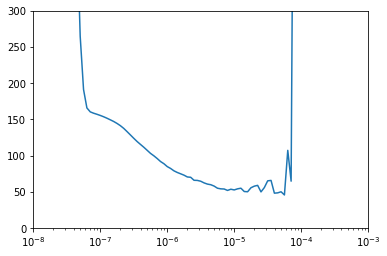

In [306]:
lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

In [312]:
window_size = 30
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=8e-5, momentum=0.9)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(dataset, epochs=500, verbose=0)

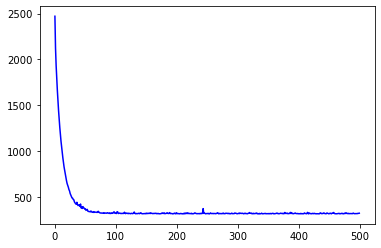

In [313]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

[1105.4869384765625, 1042.92138671875, 981.1748046875, 926.1437377929688, 873.7823486328125, 825.7722778320312, 787.7039184570312, 746.6824340820312, 710.6090087890625, 675.3919067382812, 644.8126831054688, 625.5392456054688, 604.9722900390625, 579.2261962890625, 563.726318359375, 536.0076904296875, 520.1324462890625, 504.1533203125, 488.0030822753906, 485.62445068359375, 471.6104736328125, 467.2680358886719, 444.7484130859375, 433.5757141113281, 426.1016540527344, 417.64312744140625, 440.28924560546875, 416.0924377441406, 404.47808837890625, 408.666748046875, 410.6324157714844, 395.4593505859375, 421.10491943359375, 378.6167297363281, 389.3962097167969, 373.5069580078125, 392.7540588378906, 379.6082458496094, 376.9709167480469, 365.82855224609375, 368.3514404296875, 352.21258544921875, 357.2424621582031, 363.2947998046875, 343.2728271484375, 340.4517517089844, 339.4378967285156, 338.2976379394531, 335.3432312011719, 345.5378723144531, 338.6512145996094, 331.23773193359375, 333.1597900

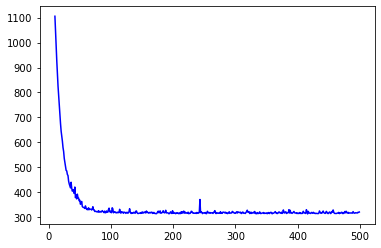

In [314]:
# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
print(plot_loss)
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

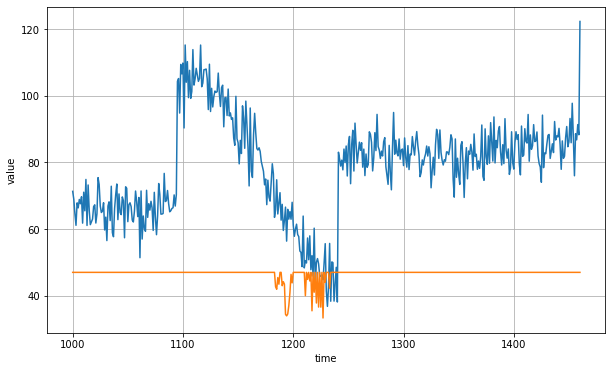

In [315]:
forecast = []
for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [311]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

5.1116405

## Implementation of RNN and LSTM on synthetic data 

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
print(tf.__version__)

2.5.0


In [3]:
#create synthetic data processing functions 
def trend(time,slope = 0):
    return time*slope
    
def seasonal_pattern(season_time):
    """ Just an arbitarary pattern. you can change it if you wish"""
    return np.where(season_time < 0.4, 
                   np.cos(season_time*2*np.pi),
                   1/np.exp(3 *season_time))

def seosonality(time, period, amplitude = 1, phase=0):
    """repeats teh same pattern at each period"""
    season_time = ((time+phase)%period) / period
    return seasonal_pattern(season_time)*amplitude

def noise(time, noise_level=1, seed =None ):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time))*noise_level

In [4]:
#create a function to plot series 
def series_print(time , series, format = '-' , start = 0, end = None):
    #plt.figure(figsize=(10, 6))
    plt.plot(time[start:end], series[start:end],format)
    plt.xlabel("time"),
    plt.ylabel("value")
    plt.grid(True)

In [5]:
#hyperparameters
time = np.arange(4 * 365 + 1, dtype = "float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

In [6]:
#divinding the series in train and test set
time = np.arange(4 * 365 + 1, dtype="float32")
split_time = 1000

train_time = time[:split_time]
train_features= final_series[:split_time]
validation_time = time[split_time:]
validation_feature = final_series[split_time:]

#setting the hyperparameters for the model 
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

NameError: name 'final_series' is not defined

In [51]:
time = np.arange(4 * 365 + 1)
print(time)

[   0    1    2 ... 1458 1459 1460]


In [52]:
trend(time, slope =0.1)

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.458e+02, 1.459e+02,
       1.460e+02])

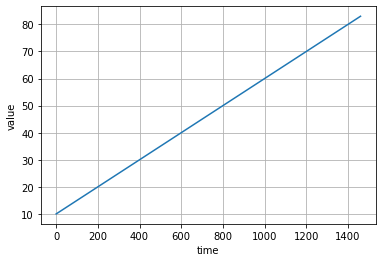

In [53]:
#plotting series component 
series = baseline + trend(time, slope)
series_print(time, series)
plt.show()

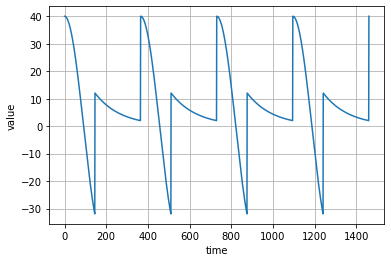

In [54]:
#plotting seasonality component 
series1 = seosonality (time , period = 365, amplitude = 40, phase = 0)
series_print(time , series1)

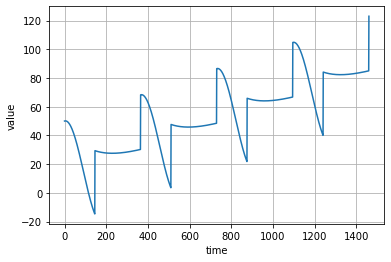

In [55]:
#adding the two components 
trend_seasonality = series + series1
series_print(time , trend_seasonality)

In [56]:
#adding noise component 
series2 = noise(time , noise_level = 5, seed = 42)
series_print(time, series2)

In [9]:
#hyperparameters
time = np.arange(4 * 365 + 1, dtype = "float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

#adding all three will form our train and test data 
final_series = baseline + trend(time, slope) + seosonality(time, period=365, amplitude=amplitude)
# Update with noise
final_series += noise(time, noise_level, seed=42)

#divinding the series in train and test set
split_time = 1000
train_time = time[:split_time]
train_features= final_series[:split_time]
validation_time = time[split_time:]
validation_feature = final_series[split_time:]

#setting the hyperparameters for the model 
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000



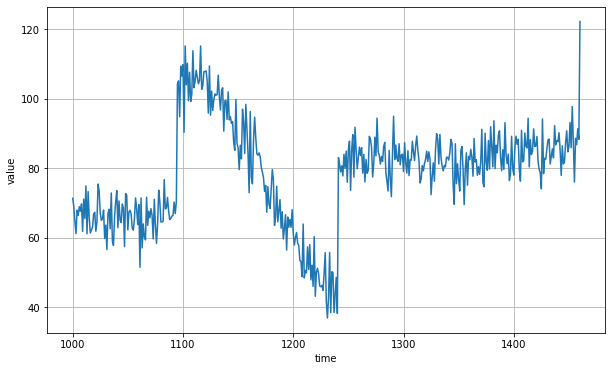

In [12]:
plt.figure(figsize=(10, 6))
series_print(validation_time, validation_feature)

- Now i have a time and series representation of the graph which i can use as my input 
- I'll create a window function now - window fundtion is nothing but the taking the 1 set of data and taking the next value as predicted this will be fed to NN 

    - window - We will then use the window method of the dataset based on our window_size to slice the data up into the appropriate windows. Each one being shifted by one time set. We'll keep them all the same size by setting drop remainder to true.

    - shuffle_buffer - You call a shuffle and you pass it the shuffle buffer. Using a shuffle buffer speeds things up a bit. So for example, if you have 100,000 items in your dataset, but you set the buffer to a thousand. It will just fill the buffer with the first thousand elements, pick one of them at random. And then it will replace that with the 1,000 and first element before randomly picking again, and so on.

    - batch_size - batching the data so that it can be processed in groups 


In [13]:
final_series 

array([ 52.48357 ,  49.35275 ,  53.314735, ...,  91.37325 ,  88.32383 ,
       122.30772 ], dtype=float32)

to fit this data into tensorflow supported datatype, we need to use either from_tensor or from_tensor_slices 
- from_tensors  -> combines the input and returns a dataset with a single element:
- from_tensor_slices -> creates a dataset with a separate element for each row of the input tensor:

In [59]:
tf.data.Dataset.from_tensor_slices(series)

<TensorSliceDataset shapes: (), types: tf.float64>

In [60]:
for ele in tf.data.Dataset.from_tensor_slices(final_series):
    print(ele)

tf.Tensor(52.483570765056164, shape=(), dtype=float64)
tf.Tensor(49.35275206250873, shape=(), dtype=float64)
tf.Tensor(53.314738720091654, shape=(), dtype=float64)
tf.Tensor(57.71182193357917, shape=(), dtype=float64)
tf.Tensor(48.93444533864675, shape=(), dtype=float64)
tf.Tensor(48.93124221263841, shape=(), dtype=float64)
tf.Tensor(57.9828968739978, shape=(), dtype=float64)
tf.Tensor(53.89712254407415, shape=(), dtype=float64)
tf.Tensor(47.673926155614154, shape=(), dtype=float64)
tf.Tensor(52.683706844477726, shape=(), dtype=float64)
tf.Tensor(47.59171580618012, shape=(), dtype=float64)
tf.Tensor(47.50637546686875, shape=(), dtype=float64)
tf.Tensor(50.95941455650678, shape=(), dtype=float64)
tf.Tensor(40.0861800669988, shape=(), dtype=float64)
tf.Tensor(40.91941291275285, shape=(), dtype=float64)
tf.Tensor(46.61247489800624, shape=(), dtype=float64)
tf.Tensor(44.22820749649382, shape=(), dtype=float64)
tf.Tensor(50.72064419717794, shape=(), dtype=float64)
tf.Tensor(44.4549826516098

tf.Tensor(69.61865627292715, shape=(), dtype=float64)
tf.Tensor(68.41122396939272, shape=(), dtype=float64)
tf.Tensor(74.19472462233392, shape=(), dtype=float64)
tf.Tensor(79.62007583296466, shape=(), dtype=float64)
tf.Tensor(76.61538822593467, shape=(), dtype=float64)
tf.Tensor(63.53417658590825, shape=(), dtype=float64)
tf.Tensor(65.8007505528353, shape=(), dtype=float64)
tf.Tensor(74.81449983738997, shape=(), dtype=float64)
tf.Tensor(64.55970456415824, shape=(), dtype=float64)
tf.Tensor(67.7104224070145, shape=(), dtype=float64)
tf.Tensor(70.94544830124644, shape=(), dtype=float64)
tf.Tensor(62.71542219278455, shape=(), dtype=float64)
tf.Tensor(67.44653955275714, shape=(), dtype=float64)
tf.Tensor(59.61281671219209, shape=(), dtype=float64)
tf.Tensor(62.64035623092907, shape=(), dtype=float64)
tf.Tensor(66.61152568689268, shape=(), dtype=float64)
tf.Tensor(56.41444307097382, shape=(), dtype=float64)
tf.Tensor(65.9501577560159, shape=(), dtype=float64)
tf.Tensor(63.019745985281844, s

In [61]:
dataset1 = tf.data.Dataset.from_tensor_slices(final_series)

In [62]:
window_size = 20
dataset = dataset1.window(window_size + 1, shift = 1, drop_remainder = True)
for ele in dataset:
    for x in ele:
        print(x)
    

tf.Tensor(52.483570765056164, shape=(), dtype=float64)
tf.Tensor(49.35275206250873, shape=(), dtype=float64)
tf.Tensor(53.314738720091654, shape=(), dtype=float64)
tf.Tensor(57.71182193357917, shape=(), dtype=float64)
tf.Tensor(48.93444533864675, shape=(), dtype=float64)
tf.Tensor(48.93124221263841, shape=(), dtype=float64)
tf.Tensor(57.9828968739978, shape=(), dtype=float64)
tf.Tensor(53.89712254407415, shape=(), dtype=float64)
tf.Tensor(47.673926155614154, shape=(), dtype=float64)
tf.Tensor(52.683706844477726, shape=(), dtype=float64)
tf.Tensor(47.59171580618012, shape=(), dtype=float64)
tf.Tensor(47.50637546686875, shape=(), dtype=float64)
tf.Tensor(50.95941455650678, shape=(), dtype=float64)
tf.Tensor(40.0861800669988, shape=(), dtype=float64)
tf.Tensor(40.91941291275285, shape=(), dtype=float64)
tf.Tensor(46.61247489800624, shape=(), dtype=float64)
tf.Tensor(44.22820749649382, shape=(), dtype=float64)
tf.Tensor(50.72064419717794, shape=(), dtype=float64)
tf.Tensor(44.4549826516098

tf.Tensor(45.61561472036271, shape=(), dtype=float64)
tf.Tensor(40.07910684941181, shape=(), dtype=float64)
tf.Tensor(49.154955434058735, shape=(), dtype=float64)
tf.Tensor(38.602701980447065, shape=(), dtype=float64)
tf.Tensor(45.406161715352496, shape=(), dtype=float64)
tf.Tensor(34.208767853913976, shape=(), dtype=float64)
tf.Tensor(37.00193411359374, shape=(), dtype=float64)
tf.Tensor(44.25351032642813, shape=(), dtype=float64)
tf.Tensor(46.578596279943625, shape=(), dtype=float64)
tf.Tensor(43.351011752380835, shape=(), dtype=float64)
tf.Tensor(41.51481463624154, shape=(), dtype=float64)
tf.Tensor(40.17753568217782, shape=(), dtype=float64)
tf.Tensor(33.87169103890548, shape=(), dtype=float64)
tf.Tensor(37.2377143997449, shape=(), dtype=float64)
tf.Tensor(38.09790511196734, shape=(), dtype=float64)
tf.Tensor(45.24254666081345, shape=(), dtype=float64)
tf.Tensor(41.22268300970987, shape=(), dtype=float64)
tf.Tensor(30.229015141757788, shape=(), dtype=float64)
tf.Tensor(40.196379682

tf.Tensor(37.497249421096676, shape=(), dtype=float64)
tf.Tensor(29.783984223941914, shape=(), dtype=float64)
tf.Tensor(34.58469362386001, shape=(), dtype=float64)
tf.Tensor(30.793398106469688, shape=(), dtype=float64)
tf.Tensor(25.173189818593137, shape=(), dtype=float64)
tf.Tensor(29.614907580867097, shape=(), dtype=float64)
tf.Tensor(34.90301359904407, shape=(), dtype=float64)
tf.Tensor(26.434553192929457, shape=(), dtype=float64)
tf.Tensor(33.83389805406793, shape=(), dtype=float64)
tf.Tensor(12.30528790488522, shape=(), dtype=float64)
tf.Tensor(28.903391445774883, shape=(), dtype=float64)
tf.Tensor(24.615707223982852, shape=(), dtype=float64)
tf.Tensor(22.068952131508095, shape=(), dtype=float64)
tf.Tensor(23.403431303009043, shape=(), dtype=float64)
tf.Tensor(12.384741265517482, shape=(), dtype=float64)
tf.Tensor(20.59970383964564, shape=(), dtype=float64)
tf.Tensor(22.85682247441586, shape=(), dtype=float64)
tf.Tensor(27.831845627832962, shape=(), dtype=float64)
tf.Tensor(17.220

tf.Tensor(8.456476071756429, shape=(), dtype=float64)
tf.Tensor(1.9209303559618256, shape=(), dtype=float64)
tf.Tensor(6.2647083660884455, shape=(), dtype=float64)
tf.Tensor(6.026493351058951, shape=(), dtype=float64)
tf.Tensor(3.1029914486664936, shape=(), dtype=float64)
tf.Tensor(5.684642225808682, shape=(), dtype=float64)
tf.Tensor(7.890598701256305, shape=(), dtype=float64)
tf.Tensor(14.683326950659888, shape=(), dtype=float64)
tf.Tensor(5.510316857672228, shape=(), dtype=float64)
tf.Tensor(5.313384462373678, shape=(), dtype=float64)
tf.Tensor(3.0449781157424596, shape=(), dtype=float64)
tf.Tensor(-6.781507620059443, shape=(), dtype=float64)
tf.Tensor(2.0786794660264434, shape=(), dtype=float64)
tf.Tensor(1.915252839655997, shape=(), dtype=float64)
tf.Tensor(13.337309622535663, shape=(), dtype=float64)
tf.Tensor(-0.5293736345719715, shape=(), dtype=float64)
tf.Tensor(1.3560241403658324, shape=(), dtype=float64)
tf.Tensor(-0.9047031598423843, shape=(), dtype=float64)
tf.Tensor(-7.14

tf.Tensor(-2.8571048398967136, shape=(), dtype=float64)
tf.Tensor(-14.971315485556072, shape=(), dtype=float64)
tf.Tensor(-13.105374711606757, shape=(), dtype=float64)
tf.Tensor(-7.859099895306095, shape=(), dtype=float64)
tf.Tensor(-18.50408444671292, shape=(), dtype=float64)
tf.Tensor(-11.626857921833768, shape=(), dtype=float64)
tf.Tensor(-6.63401879149507, shape=(), dtype=float64)
tf.Tensor(-21.603768944812494, shape=(), dtype=float64)
tf.Tensor(-13.03071658628355, shape=(), dtype=float64)
tf.Tensor(-13.032788261978894, shape=(), dtype=float64)
tf.Tensor(-10.792060556568035, shape=(), dtype=float64)
tf.Tensor(23.163014922097673, shape=(), dtype=float64)
tf.Tensor(22.69686848666786, shape=(), dtype=float64)
tf.Tensor(31.861049683918157, shape=(), dtype=float64)
tf.Tensor(30.689256146326997, shape=(), dtype=float64)
tf.Tensor(30.410582023326647, shape=(), dtype=float64)
tf.Tensor(30.844931377796392, shape=(), dtype=float64)
tf.Tensor(25.66792040178492, shape=(), dtype=float64)
tf.Ten

tf.Tensor(30.338299872098197, shape=(), dtype=float64)
tf.Tensor(37.97182272210303, shape=(), dtype=float64)
tf.Tensor(27.227933864800022, shape=(), dtype=float64)
tf.Tensor(24.653889518752415, shape=(), dtype=float64)
tf.Tensor(23.943367787806245, shape=(), dtype=float64)
tf.Tensor(24.28092629160526, shape=(), dtype=float64)
tf.Tensor(27.94416966554065, shape=(), dtype=float64)
tf.Tensor(30.00579587389865, shape=(), dtype=float64)
tf.Tensor(29.65449969444428, shape=(), dtype=float64)
tf.Tensor(32.378618215516454, shape=(), dtype=float64)
tf.Tensor(28.28000898429986, shape=(), dtype=float64)
tf.Tensor(35.45560349809318, shape=(), dtype=float64)
tf.Tensor(26.838213360093153, shape=(), dtype=float64)
tf.Tensor(41.73653343616088, shape=(), dtype=float64)
tf.Tensor(31.238834960561462, shape=(), dtype=float64)
tf.Tensor(23.8001365203336, shape=(), dtype=float64)
tf.Tensor(22.707498317081807, shape=(), dtype=float64)
tf.Tensor(30.450964816245644, shape=(), dtype=float64)
tf.Tensor(26.8985312

tf.Tensor(29.51843417542262, shape=(), dtype=float64)
tf.Tensor(30.520150258960683, shape=(), dtype=float64)
tf.Tensor(33.118731990501104, shape=(), dtype=float64)
tf.Tensor(32.96024783715309, shape=(), dtype=float64)
tf.Tensor(20.79116198987747, shape=(), dtype=float64)
tf.Tensor(22.97916016300004, shape=(), dtype=float64)
tf.Tensor(30.232739375792292, shape=(), dtype=float64)
tf.Tensor(30.216267513631156, shape=(), dtype=float64)
tf.Tensor(30.212843883534234, shape=(), dtype=float64)
tf.Tensor(46.8920195365922, shape=(), dtype=float64)
tf.Tensor(30.474056204278057, shape=(), dtype=float64)
tf.Tensor(33.289154385946176, shape=(), dtype=float64)
tf.Tensor(32.373534566527624, shape=(), dtype=float64)
tf.Tensor(30.853154694672522, shape=(), dtype=float64)
tf.Tensor(26.012994156325345, shape=(), dtype=float64)
tf.Tensor(31.377793834617123, shape=(), dtype=float64)
tf.Tensor(23.712890613706378, shape=(), dtype=float64)
tf.Tensor(26.387450430120555, shape=(), dtype=float64)
tf.Tensor(25.139

tf.Tensor(24.24705716708239, shape=(), dtype=float64)
tf.Tensor(31.821859102580948, shape=(), dtype=float64)
tf.Tensor(23.601170638390897, shape=(), dtype=float64)
tf.Tensor(26.9945498874441, shape=(), dtype=float64)
tf.Tensor(30.09799903955673, shape=(), dtype=float64)
tf.Tensor(31.907038899598213, shape=(), dtype=float64)
tf.Tensor(21.582347885322356, shape=(), dtype=float64)
tf.Tensor(25.917254439326793, shape=(), dtype=float64)
tf.Tensor(25.221325489620185, shape=(), dtype=float64)
tf.Tensor(24.33605508566856, shape=(), dtype=float64)
tf.Tensor(36.436976500698755, shape=(), dtype=float64)
tf.Tensor(29.6419698478953, shape=(), dtype=float64)
tf.Tensor(21.320346577426342, shape=(), dtype=float64)
tf.Tensor(32.222127345354, shape=(), dtype=float64)
tf.Tensor(38.25199322723099, shape=(), dtype=float64)
tf.Tensor(32.812273737458625, shape=(), dtype=float64)
tf.Tensor(38.264750770314116, shape=(), dtype=float64)
tf.Tensor(30.7167809805418, shape=(), dtype=float64)
tf.Tensor(17.4240201113

tf.Tensor(31.332735462122592, shape=(), dtype=float64)
tf.Tensor(35.96965272014816, shape=(), dtype=float64)
tf.Tensor(21.868243833809007, shape=(), dtype=float64)
tf.Tensor(38.74050484988847, shape=(), dtype=float64)
tf.Tensor(18.333177427156635, shape=(), dtype=float64)
tf.Tensor(27.35322905429341, shape=(), dtype=float64)
tf.Tensor(20.655771726089842, shape=(), dtype=float64)
tf.Tensor(25.619777707941523, shape=(), dtype=float64)
tf.Tensor(28.487523147687345, shape=(), dtype=float64)
tf.Tensor(35.05430297657338, shape=(), dtype=float64)
tf.Tensor(20.683035771351975, shape=(), dtype=float64)
tf.Tensor(33.69286660575851, shape=(), dtype=float64)
tf.Tensor(27.943203404932397, shape=(), dtype=float64)
tf.Tensor(22.99977167146893, shape=(), dtype=float64)
tf.Tensor(30.23339335118944, shape=(), dtype=float64)
tf.Tensor(28.934017410662715, shape=(), dtype=float64)
tf.Tensor(24.953757092193054, shape=(), dtype=float64)
tf.Tensor(28.320251751797606, shape=(), dtype=float64)
tf.Tensor(26.0613

tf.Tensor(30.451354523848952, shape=(), dtype=float64)
tf.Tensor(28.205819716050367, shape=(), dtype=float64)
tf.Tensor(29.367723391086383, shape=(), dtype=float64)
tf.Tensor(25.619074939697164, shape=(), dtype=float64)
tf.Tensor(32.1788632174833, shape=(), dtype=float64)
tf.Tensor(31.51688736662441, shape=(), dtype=float64)
tf.Tensor(28.38339286537669, shape=(), dtype=float64)
tf.Tensor(29.097624662505904, shape=(), dtype=float64)
tf.Tensor(34.922619432571935, shape=(), dtype=float64)
tf.Tensor(25.59996371078298, shape=(), dtype=float64)
tf.Tensor(31.317049967330767, shape=(), dtype=float64)
tf.Tensor(27.594557137176913, shape=(), dtype=float64)
tf.Tensor(27.541284893104404, shape=(), dtype=float64)
tf.Tensor(34.147957106180755, shape=(), dtype=float64)
tf.Tensor(32.80574622466429, shape=(), dtype=float64)
tf.Tensor(32.7710122732127, shape=(), dtype=float64)
tf.Tensor(35.25586402005366, shape=(), dtype=float64)
tf.Tensor(28.858699672621697, shape=(), dtype=float64)
tf.Tensor(32.188858

tf.Tensor(28.563085277669302, shape=(), dtype=float64)
tf.Tensor(25.200026518561973, shape=(), dtype=float64)
tf.Tensor(27.749894358390236, shape=(), dtype=float64)
tf.Tensor(31.450961251303507, shape=(), dtype=float64)
tf.Tensor(26.597329592109006, shape=(), dtype=float64)
tf.Tensor(25.334665342574123, shape=(), dtype=float64)
tf.Tensor(30.69418356661164, shape=(), dtype=float64)
tf.Tensor(30.730724425466146, shape=(), dtype=float64)
tf.Tensor(27.0014822844887, shape=(), dtype=float64)
tf.Tensor(27.211474424932394, shape=(), dtype=float64)
tf.Tensor(30.75754331224612, shape=(), dtype=float64)
tf.Tensor(22.387658162456724, shape=(), dtype=float64)
tf.Tensor(22.621704516607036, shape=(), dtype=float64)
tf.Tensor(26.097901787469436, shape=(), dtype=float64)
tf.Tensor(28.65414135028151, shape=(), dtype=float64)
tf.Tensor(31.307322595430705, shape=(), dtype=float64)
tf.Tensor(37.161125698268556, shape=(), dtype=float64)
tf.Tensor(34.104353517361645, shape=(), dtype=float64)
tf.Tensor(29.04

tf.Tensor(72.44662741832342, shape=(), dtype=float64)
tf.Tensor(68.91631322736836, shape=(), dtype=float64)
tf.Tensor(78.85159595637616, shape=(), dtype=float64)
tf.Tensor(63.752510648542255, shape=(), dtype=float64)
tf.Tensor(63.475303333307224, shape=(), dtype=float64)
tf.Tensor(64.54539987094583, shape=(), dtype=float64)
tf.Tensor(56.77992891265254, shape=(), dtype=float64)
tf.Tensor(64.6163279208121, shape=(), dtype=float64)
tf.Tensor(63.28384681527452, shape=(), dtype=float64)
tf.Tensor(67.65466163289491, shape=(), dtype=float64)
tf.Tensor(68.42349785141172, shape=(), dtype=float64)
tf.Tensor(75.89651065220642, shape=(), dtype=float64)
tf.Tensor(71.05770114454975, shape=(), dtype=float64)
tf.Tensor(64.4901632929861, shape=(), dtype=float64)
tf.Tensor(68.47447786867903, shape=(), dtype=float64)
tf.Tensor(70.8268242526881, shape=(), dtype=float64)
tf.Tensor(75.56566693728482, shape=(), dtype=float64)
tf.Tensor(73.06765221571494, shape=(), dtype=float64)
tf.Tensor(78.98681891410568, 

tf.Tensor(55.40606819951802, shape=(), dtype=float64)
tf.Tensor(59.631158623076274, shape=(), dtype=float64)
tf.Tensor(60.53453231868376, shape=(), dtype=float64)
tf.Tensor(62.08649516103637, shape=(), dtype=float64)
tf.Tensor(62.64500983216289, shape=(), dtype=float64)
tf.Tensor(53.02788850757693, shape=(), dtype=float64)
tf.Tensor(50.53636467604076, shape=(), dtype=float64)
tf.Tensor(64.1429756713601, shape=(), dtype=float64)
tf.Tensor(58.95578597846942, shape=(), dtype=float64)
tf.Tensor(53.08352715236573, shape=(), dtype=float64)
tf.Tensor(64.1057367596737, shape=(), dtype=float64)
tf.Tensor(56.44479609087415, shape=(), dtype=float64)
tf.Tensor(61.27194197106812, shape=(), dtype=float64)
tf.Tensor(55.214828983287205, shape=(), dtype=float64)
tf.Tensor(64.67566656954467, shape=(), dtype=float64)
tf.Tensor(62.636395919887505, shape=(), dtype=float64)
tf.Tensor(52.09587672388641, shape=(), dtype=float64)
tf.Tensor(62.127767326909606, shape=(), dtype=float64)
tf.Tensor(59.2688767896863

tf.Tensor(53.605908494570684, shape=(), dtype=float64)
tf.Tensor(37.963176097404755, shape=(), dtype=float64)
tf.Tensor(35.743767578222126, shape=(), dtype=float64)
tf.Tensor(43.376274930850855, shape=(), dtype=float64)
tf.Tensor(44.9642061685953, shape=(), dtype=float64)
tf.Tensor(42.266998142321526, shape=(), dtype=float64)
tf.Tensor(31.47677838363805, shape=(), dtype=float64)
tf.Tensor(40.749027222767594, shape=(), dtype=float64)
tf.Tensor(34.05023833599768, shape=(), dtype=float64)
tf.Tensor(43.29642602298339, shape=(), dtype=float64)
tf.Tensor(41.154250847341366, shape=(), dtype=float64)
tf.Tensor(33.99297647248861, shape=(), dtype=float64)
tf.Tensor(35.492277221998265, shape=(), dtype=float64)
tf.Tensor(32.13310294602682, shape=(), dtype=float64)
tf.Tensor(36.48185838020066, shape=(), dtype=float64)
tf.Tensor(40.93577600374783, shape=(), dtype=float64)
tf.Tensor(30.595174964245384, shape=(), dtype=float64)
tf.Tensor(37.40691218161336, shape=(), dtype=float64)
tf.Tensor(31.5976031

tf.Tensor(22.745085931425393, shape=(), dtype=float64)
tf.Tensor(11.99279162092931, shape=(), dtype=float64)
tf.Tensor(15.311472482520273, shape=(), dtype=float64)
tf.Tensor(29.110003845982483, shape=(), dtype=float64)
tf.Tensor(29.892046262079717, shape=(), dtype=float64)
tf.Tensor(19.817168258653872, shape=(), dtype=float64)
tf.Tensor(23.344033658551357, shape=(), dtype=float64)
tf.Tensor(21.420352562668548, shape=(), dtype=float64)
tf.Tensor(34.66550310238543, shape=(), dtype=float64)
tf.Tensor(24.280305746506528, shape=(), dtype=float64)
tf.Tensor(17.458699471293937, shape=(), dtype=float64)
tf.Tensor(12.7411534856817, shape=(), dtype=float64)
tf.Tensor(8.912090882212802, shape=(), dtype=float64)
tf.Tensor(17.392191055151592, shape=(), dtype=float64)
tf.Tensor(12.028936695494327, shape=(), dtype=float64)
tf.Tensor(8.140688569329633, shape=(), dtype=float64)
tf.Tensor(11.465988921624998, shape=(), dtype=float64)
tf.Tensor(8.743817793067215, shape=(), dtype=float64)
tf.Tensor(22.0459

tf.Tensor(46.35441131775719, shape=(), dtype=float64)
tf.Tensor(42.963523545625684, shape=(), dtype=float64)
tf.Tensor(44.57047612731941, shape=(), dtype=float64)
tf.Tensor(51.185073900726046, shape=(), dtype=float64)
tf.Tensor(49.867276268433415, shape=(), dtype=float64)
tf.Tensor(42.43026778568462, shape=(), dtype=float64)
tf.Tensor(47.770833942983366, shape=(), dtype=float64)
tf.Tensor(50.98800482412929, shape=(), dtype=float64)
tf.Tensor(38.84170168875759, shape=(), dtype=float64)
tf.Tensor(49.86394380089051, shape=(), dtype=float64)
tf.Tensor(43.79318845935378, shape=(), dtype=float64)
tf.Tensor(49.91920854618441, shape=(), dtype=float64)
tf.Tensor(43.21056481749234, shape=(), dtype=float64)
tf.Tensor(3.0502154863221023, shape=(), dtype=float64)
tf.Tensor(2.118297815898444, shape=(), dtype=float64)
tf.Tensor(0.36369337959456516, shape=(), dtype=float64)
tf.Tensor(4.538722260779071, shape=(), dtype=float64)
tf.Tensor(-0.23695281527619727, shape=(), dtype=float64)
tf.Tensor(4.901109

tf.Tensor(43.63658635017844, shape=(), dtype=float64)
tf.Tensor(50.67116253066204, shape=(), dtype=float64)
tf.Tensor(40.81646525162223, shape=(), dtype=float64)
tf.Tensor(49.086954001883015, shape=(), dtype=float64)
tf.Tensor(53.61934062957244, shape=(), dtype=float64)
tf.Tensor(34.02746510257634, shape=(), dtype=float64)
tf.Tensor(42.37602194438405, shape=(), dtype=float64)
tf.Tensor(49.22128493831771, shape=(), dtype=float64)
tf.Tensor(45.2967338771724, shape=(), dtype=float64)
tf.Tensor(48.14433210688627, shape=(), dtype=float64)
tf.Tensor(43.24591921103902, shape=(), dtype=float64)
tf.Tensor(46.67663204335818, shape=(), dtype=float64)
tf.Tensor(45.443725572270075, shape=(), dtype=float64)
tf.Tensor(52.04003654760531, shape=(), dtype=float64)
tf.Tensor(47.45282599728196, shape=(), dtype=float64)
tf.Tensor(47.84890692782322, shape=(), dtype=float64)
tf.Tensor(44.08225220144756, shape=(), dtype=float64)
tf.Tensor(43.684916225604255, shape=(), dtype=float64)
tf.Tensor(43.9420289797193

tf.Tensor(47.531974627890925, shape=(), dtype=float64)
tf.Tensor(44.79210280795968, shape=(), dtype=float64)
tf.Tensor(50.02538998923605, shape=(), dtype=float64)
tf.Tensor(34.81392710577279, shape=(), dtype=float64)
tf.Tensor(47.039398975586, shape=(), dtype=float64)
tf.Tensor(49.70785171849644, shape=(), dtype=float64)
tf.Tensor(38.45326720924433, shape=(), dtype=float64)
tf.Tensor(51.558110595561715, shape=(), dtype=float64)
tf.Tensor(47.52542976962286, shape=(), dtype=float64)
tf.Tensor(43.75057711689023, shape=(), dtype=float64)
tf.Tensor(48.98545279435203, shape=(), dtype=float64)
tf.Tensor(57.16998860594341, shape=(), dtype=float64)
tf.Tensor(46.721286804155945, shape=(), dtype=float64)
tf.Tensor(47.04893634473925, shape=(), dtype=float64)
tf.Tensor(43.50734981610847, shape=(), dtype=float64)
tf.Tensor(41.55169275694988, shape=(), dtype=float64)
tf.Tensor(49.94978977072837, shape=(), dtype=float64)
tf.Tensor(41.5153198682825, shape=(), dtype=float64)
tf.Tensor(46.1516271818463, 

tf.Tensor(41.94928609926073, shape=(), dtype=float64)
tf.Tensor(39.599789128097356, shape=(), dtype=float64)
tf.Tensor(36.934661684226214, shape=(), dtype=float64)
tf.Tensor(53.314051478047155, shape=(), dtype=float64)
tf.Tensor(49.111588900301825, shape=(), dtype=float64)
tf.Tensor(45.56812869087268, shape=(), dtype=float64)
tf.Tensor(47.25254438013622, shape=(), dtype=float64)
tf.Tensor(40.232260062801394, shape=(), dtype=float64)
tf.Tensor(58.09582119117465, shape=(), dtype=float64)
tf.Tensor(46.520872258977704, shape=(), dtype=float64)
tf.Tensor(46.429791583104574, shape=(), dtype=float64)
tf.Tensor(49.52004536166129, shape=(), dtype=float64)
tf.Tensor(48.30499359338646, shape=(), dtype=float64)
tf.Tensor(47.028440521425814, shape=(), dtype=float64)
tf.Tensor(41.96605609608624, shape=(), dtype=float64)
tf.Tensor(48.28551039802553, shape=(), dtype=float64)
tf.Tensor(55.348360879744625, shape=(), dtype=float64)
tf.Tensor(52.675735261662986, shape=(), dtype=float64)
tf.Tensor(53.92528

tf.Tensor(55.58839689949587, shape=(), dtype=float64)
tf.Tensor(51.99497967721012, shape=(), dtype=float64)
tf.Tensor(45.036506712522744, shape=(), dtype=float64)
tf.Tensor(40.86737168051829, shape=(), dtype=float64)
tf.Tensor(59.28610463174584, shape=(), dtype=float64)
tf.Tensor(37.82365317191395, shape=(), dtype=float64)
tf.Tensor(50.22819944705874, shape=(), dtype=float64)
tf.Tensor(46.49363768092573, shape=(), dtype=float64)
tf.Tensor(39.6922336011292, shape=(), dtype=float64)
tf.Tensor(39.68192106639061, shape=(), dtype=float64)
tf.Tensor(44.49395248342245, shape=(), dtype=float64)
tf.Tensor(54.53382655924233, shape=(), dtype=float64)
tf.Tensor(44.90688472116901, shape=(), dtype=float64)
tf.Tensor(38.70552656125698, shape=(), dtype=float64)
tf.Tensor(45.009200889079864, shape=(), dtype=float64)
tf.Tensor(44.89124602594763, shape=(), dtype=float64)
tf.Tensor(32.787648874809506, shape=(), dtype=float64)
tf.Tensor(46.01809430683234, shape=(), dtype=float64)
tf.Tensor(45.1526486768998

tf.Tensor(45.395094053577736, shape=(), dtype=float64)
tf.Tensor(54.212360134780425, shape=(), dtype=float64)
tf.Tensor(33.46018699749202, shape=(), dtype=float64)
tf.Tensor(52.19543509480974, shape=(), dtype=float64)
tf.Tensor(52.99141370845014, shape=(), dtype=float64)
tf.Tensor(36.41734379158907, shape=(), dtype=float64)
tf.Tensor(45.09438268456039, shape=(), dtype=float64)
tf.Tensor(44.97435873150162, shape=(), dtype=float64)
tf.Tensor(39.81796192575728, shape=(), dtype=float64)
tf.Tensor(42.990607471286125, shape=(), dtype=float64)
tf.Tensor(41.35119361891566, shape=(), dtype=float64)
tf.Tensor(55.69001669684226, shape=(), dtype=float64)
tf.Tensor(51.63185605894681, shape=(), dtype=float64)
tf.Tensor(53.33624545925281, shape=(), dtype=float64)
tf.Tensor(50.61204078467408, shape=(), dtype=float64)
tf.Tensor(41.383835002988384, shape=(), dtype=float64)
tf.Tensor(44.43210717577827, shape=(), dtype=float64)
tf.Tensor(49.52739556754633, shape=(), dtype=float64)
tf.Tensor(40.99589594342

tf.Tensor(49.935803465491965, shape=(), dtype=float64)
tf.Tensor(47.78320359671651, shape=(), dtype=float64)
tf.Tensor(53.51929417752329, shape=(), dtype=float64)
tf.Tensor(48.605482856831, shape=(), dtype=float64)
tf.Tensor(48.81756420866093, shape=(), dtype=float64)
tf.Tensor(52.11074453523972, shape=(), dtype=float64)
tf.Tensor(46.59489334158811, shape=(), dtype=float64)
tf.Tensor(44.934757082584795, shape=(), dtype=float64)
tf.Tensor(52.82255863170898, shape=(), dtype=float64)
tf.Tensor(44.08510511394141, shape=(), dtype=float64)
tf.Tensor(40.59399749810758, shape=(), dtype=float64)
tf.Tensor(39.88280648850937, shape=(), dtype=float64)
tf.Tensor(50.72581707713448, shape=(), dtype=float64)
tf.Tensor(41.323600746670664, shape=(), dtype=float64)
tf.Tensor(56.529862479844354, shape=(), dtype=float64)
tf.Tensor(37.376551121925736, shape=(), dtype=float64)
tf.Tensor(56.2989477944742, shape=(), dtype=float64)
tf.Tensor(48.90238096147103, shape=(), dtype=float64)
tf.Tensor(47.3945143105913

tf.Tensor(81.87249287243496, shape=(), dtype=float64)
tf.Tensor(82.43751401425615, shape=(), dtype=float64)
tf.Tensor(44.56639491081712, shape=(), dtype=float64)
tf.Tensor(87.4792262754884, shape=(), dtype=float64)
tf.Tensor(81.6522096802895, shape=(), dtype=float64)
tf.Tensor(88.61755980816055, shape=(), dtype=float64)
tf.Tensor(78.08375463034983, shape=(), dtype=float64)
tf.Tensor(91.75099039889164, shape=(), dtype=float64)
tf.Tensor(88.96491440944953, shape=(), dtype=float64)
tf.Tensor(87.86698146803022, shape=(), dtype=float64)
tf.Tensor(91.47340381803718, shape=(), dtype=float64)
tf.Tensor(94.8486703076018, shape=(), dtype=float64)
tf.Tensor(91.54275695163855, shape=(), dtype=float64)
tf.Tensor(77.2044331135842, shape=(), dtype=float64)
tf.Tensor(79.93713940104152, shape=(), dtype=float64)
tf.Tensor(83.12551031019822, shape=(), dtype=float64)
tf.Tensor(86.28303654134196, shape=(), dtype=float64)
tf.Tensor(88.63229717766363, shape=(), dtype=float64)
tf.Tensor(82.29519347844378, sha

tf.Tensor(79.05103596045944, shape=(), dtype=float64)
tf.Tensor(86.56995278508049, shape=(), dtype=float64)
tf.Tensor(79.90538644267556, shape=(), dtype=float64)
tf.Tensor(83.09848970878659, shape=(), dtype=float64)
tf.Tensor(94.98352353539636, shape=(), dtype=float64)
tf.Tensor(81.38736199556806, shape=(), dtype=float64)
tf.Tensor(87.28859750497118, shape=(), dtype=float64)
tf.Tensor(77.69103810467274, shape=(), dtype=float64)
tf.Tensor(80.68690128784391, shape=(), dtype=float64)
tf.Tensor(89.36112165149041, shape=(), dtype=float64)
tf.Tensor(77.00802906914706, shape=(), dtype=float64)
tf.Tensor(88.83144693706717, shape=(), dtype=float64)
tf.Tensor(82.92502305724395, shape=(), dtype=float64)
tf.Tensor(76.18183646695965, shape=(), dtype=float64)
tf.Tensor(81.75509474346035, shape=(), dtype=float64)
tf.Tensor(83.04582640825791, shape=(), dtype=float64)
tf.Tensor(80.87335080182861, shape=(), dtype=float64)
tf.Tensor(69.48581184226616, shape=(), dtype=float64)
tf.Tensor(73.26541308764195,

tf.Tensor(72.14294758079987, shape=(), dtype=float64)
tf.Tensor(70.4889699921028, shape=(), dtype=float64)
tf.Tensor(70.25820385642561, shape=(), dtype=float64)
tf.Tensor(61.96062580721855, shape=(), dtype=float64)
tf.Tensor(62.377605455250865, shape=(), dtype=float64)
tf.Tensor(72.48181354490708, shape=(), dtype=float64)
tf.Tensor(66.44625906256032, shape=(), dtype=float64)
tf.Tensor(69.47453262126302, shape=(), dtype=float64)
tf.Tensor(65.62680986188383, shape=(), dtype=float64)
tf.Tensor(65.0475692890975, shape=(), dtype=float64)
tf.Tensor(68.99934858320502, shape=(), dtype=float64)
tf.Tensor(61.13260712562736, shape=(), dtype=float64)
tf.Tensor(63.594287273184136, shape=(), dtype=float64)
tf.Tensor(60.19930333147269, shape=(), dtype=float64)
tf.Tensor(59.73153228817237, shape=(), dtype=float64)
tf.Tensor(59.748018306555565, shape=(), dtype=float64)
tf.Tensor(61.791140740960564, shape=(), dtype=float64)
tf.Tensor(57.670245775520044, shape=(), dtype=float64)
tf.Tensor(65.723408048199

tf.Tensor(55.93080491543667, shape=(), dtype=float64)
tf.Tensor(44.782894314918806, shape=(), dtype=float64)
tf.Tensor(44.6616819307007, shape=(), dtype=float64)
tf.Tensor(44.72048869432963, shape=(), dtype=float64)
tf.Tensor(38.77553151104251, shape=(), dtype=float64)
tf.Tensor(40.27467524749425, shape=(), dtype=float64)
tf.Tensor(39.21936209993246, shape=(), dtype=float64)
tf.Tensor(39.77538996925395, shape=(), dtype=float64)
tf.Tensor(42.81764634720483, shape=(), dtype=float64)
tf.Tensor(43.54141807986622, shape=(), dtype=float64)
tf.Tensor(49.50489990867762, shape=(), dtype=float64)
tf.Tensor(36.14565758981908, shape=(), dtype=float64)
tf.Tensor(45.44724450114278, shape=(), dtype=float64)
tf.Tensor(38.84726347344576, shape=(), dtype=float64)
tf.Tensor(39.0650299081736, shape=(), dtype=float64)
tf.Tensor(42.08534630410555, shape=(), dtype=float64)
tf.Tensor(62.07807877509589, shape=(), dtype=float64)
tf.Tensor(48.130995003925385, shape=(), dtype=float64)
tf.Tensor(47.07963186009887,

tf.Tensor(29.2146221746066, shape=(), dtype=float64)
tf.Tensor(37.80533016931715, shape=(), dtype=float64)
tf.Tensor(38.42761890871013, shape=(), dtype=float64)
tf.Tensor(27.942550199863867, shape=(), dtype=float64)
tf.Tensor(26.112193163482118, shape=(), dtype=float64)
tf.Tensor(32.115413119862936, shape=(), dtype=float64)
tf.Tensor(26.488426984052026, shape=(), dtype=float64)
tf.Tensor(31.91241630282361, shape=(), dtype=float64)
tf.Tensor(29.26775897375638, shape=(), dtype=float64)
tf.Tensor(20.187142977519905, shape=(), dtype=float64)
tf.Tensor(35.023601477468304, shape=(), dtype=float64)
tf.Tensor(35.79332497755567, shape=(), dtype=float64)
tf.Tensor(23.28565824487682, shape=(), dtype=float64)
tf.Tensor(23.954715335335667, shape=(), dtype=float64)
tf.Tensor(26.874277929749642, shape=(), dtype=float64)
tf.Tensor(26.677216819356744, shape=(), dtype=float64)
tf.Tensor(27.866035381209716, shape=(), dtype=float64)
tf.Tensor(34.2012598292886, shape=(), dtype=float64)
tf.Tensor(22.8511062

tf.Tensor(74.6722647230446, shape=(), dtype=float64)
tf.Tensor(68.31678376562067, shape=(), dtype=float64)
tf.Tensor(63.55984680014772, shape=(), dtype=float64)
tf.Tensor(68.26948935668015, shape=(), dtype=float64)
tf.Tensor(70.82037850311946, shape=(), dtype=float64)
tf.Tensor(69.34064831465457, shape=(), dtype=float64)
tf.Tensor(67.73670979718008, shape=(), dtype=float64)
tf.Tensor(70.49653480912093, shape=(), dtype=float64)
tf.Tensor(70.97317463013869, shape=(), dtype=float64)
tf.Tensor(72.00173470589176, shape=(), dtype=float64)
tf.Tensor(68.29943422417259, shape=(), dtype=float64)
tf.Tensor(64.18593563697577, shape=(), dtype=float64)
tf.Tensor(65.7214262409999, shape=(), dtype=float64)
tf.Tensor(70.98741927735617, shape=(), dtype=float64)
tf.Tensor(60.83789198560368, shape=(), dtype=float64)
tf.Tensor(66.73430648029836, shape=(), dtype=float64)
tf.Tensor(62.89328365479565, shape=(), dtype=float64)
tf.Tensor(64.97340232728526, shape=(), dtype=float64)
tf.Tensor(71.19229531285194, s

tf.Tensor(61.65801424081259, shape=(), dtype=float64)
tf.Tensor(59.05139895409543, shape=(), dtype=float64)
tf.Tensor(65.38417185508807, shape=(), dtype=float64)
tf.Tensor(62.198553708023255, shape=(), dtype=float64)
tf.Tensor(65.38134358193875, shape=(), dtype=float64)
tf.Tensor(69.75979578135876, shape=(), dtype=float64)
tf.Tensor(59.240370848911425, shape=(), dtype=float64)
tf.Tensor(65.01966828955187, shape=(), dtype=float64)
tf.Tensor(60.836646073549694, shape=(), dtype=float64)
tf.Tensor(70.29546661418112, shape=(), dtype=float64)
tf.Tensor(56.68783083150296, shape=(), dtype=float64)
tf.Tensor(61.49323207921106, shape=(), dtype=float64)
tf.Tensor(66.15851627180481, shape=(), dtype=float64)
tf.Tensor(72.08522782727114, shape=(), dtype=float64)
tf.Tensor(63.91453798314959, shape=(), dtype=float64)
tf.Tensor(61.453499740215214, shape=(), dtype=float64)
tf.Tensor(73.62201297432247, shape=(), dtype=float64)
tf.Tensor(56.9634062725435, shape=(), dtype=float64)
tf.Tensor(53.197207793878

tf.Tensor(65.75590490463969, shape=(), dtype=float64)
tf.Tensor(66.32494814430089, shape=(), dtype=float64)
tf.Tensor(66.88934057244037, shape=(), dtype=float64)
tf.Tensor(66.27878391752225, shape=(), dtype=float64)
tf.Tensor(67.25400329080458, shape=(), dtype=float64)
tf.Tensor(70.68670857629505, shape=(), dtype=float64)
tf.Tensor(65.02451292826777, shape=(), dtype=float64)
tf.Tensor(67.5882884289596, shape=(), dtype=float64)
tf.Tensor(63.59635185225135, shape=(), dtype=float64)
tf.Tensor(71.24777194619911, shape=(), dtype=float64)
tf.Tensor(60.66777153436846, shape=(), dtype=float64)
tf.Tensor(73.05737080969247, shape=(), dtype=float64)
tf.Tensor(63.85519973770262, shape=(), dtype=float64)
tf.Tensor(65.27865277547693, shape=(), dtype=float64)
tf.Tensor(62.85165312395592, shape=(), dtype=float64)
tf.Tensor(65.81443129638117, shape=(), dtype=float64)
tf.Tensor(57.79321748332162, shape=(), dtype=float64)
tf.Tensor(71.26693370837344, shape=(), dtype=float64)
tf.Tensor(63.634983105864, sh

tf.Tensor(68.05376714235572, shape=(), dtype=float64)
tf.Tensor(66.26010541900494, shape=(), dtype=float64)
tf.Tensor(59.30633152652176, shape=(), dtype=float64)
tf.Tensor(63.911390653992996, shape=(), dtype=float64)
tf.Tensor(64.14100770457732, shape=(), dtype=float64)
tf.Tensor(58.37660492735009, shape=(), dtype=float64)
tf.Tensor(71.69516012118132, shape=(), dtype=float64)
tf.Tensor(68.57504985024781, shape=(), dtype=float64)
tf.Tensor(63.09381416173978, shape=(), dtype=float64)
tf.Tensor(64.34378503245806, shape=(), dtype=float64)
tf.Tensor(65.2623122033827, shape=(), dtype=float64)
tf.Tensor(54.023085035449114, shape=(), dtype=float64)
tf.Tensor(63.007549956405725, shape=(), dtype=float64)
tf.Tensor(60.84550680908303, shape=(), dtype=float64)
tf.Tensor(59.259630300589855, shape=(), dtype=float64)
tf.Tensor(62.87483976087801, shape=(), dtype=float64)
tf.Tensor(73.28169078321733, shape=(), dtype=float64)
tf.Tensor(67.51069292222806, shape=(), dtype=float64)
tf.Tensor(61.464105192512

tf.Tensor(65.43277203521433, shape=(), dtype=float64)
tf.Tensor(67.92169834132132, shape=(), dtype=float64)
tf.Tensor(59.76187207094958, shape=(), dtype=float64)
tf.Tensor(63.610910062294074, shape=(), dtype=float64)
tf.Tensor(56.57705977129407, shape=(), dtype=float64)
tf.Tensor(74.91587300254773, shape=(), dtype=float64)
tf.Tensor(61.11138223749542, shape=(), dtype=float64)
tf.Tensor(73.25515699243338, shape=(), dtype=float64)
tf.Tensor(65.58317034208238, shape=(), dtype=float64)
tf.Tensor(61.355064511399085, shape=(), dtype=float64)
tf.Tensor(62.21152099502529, shape=(), dtype=float64)
tf.Tensor(63.04826468325504, shape=(), dtype=float64)
tf.Tensor(66.79013534750612, shape=(), dtype=float64)
tf.Tensor(67.303038705634, shape=(), dtype=float64)
tf.Tensor(61.84016609773737, shape=(), dtype=float64)
tf.Tensor(64.60694517027159, shape=(), dtype=float64)
tf.Tensor(75.4603670778103, shape=(), dtype=float64)
tf.Tensor(73.40727142087349, shape=(), dtype=float64)
tf.Tensor(66.97195534664453, 

tf.Tensor(64.36533348457792, shape=(), dtype=float64)
tf.Tensor(69.67198015189126, shape=(), dtype=float64)
tf.Tensor(68.54070825114162, shape=(), dtype=float64)
tf.Tensor(57.42274772225589, shape=(), dtype=float64)
tf.Tensor(72.71322451003623, shape=(), dtype=float64)
tf.Tensor(72.25699175862604, shape=(), dtype=float64)
tf.Tensor(62.25493005857514, shape=(), dtype=float64)
tf.Tensor(67.3881645560599, shape=(), dtype=float64)
tf.Tensor(67.90589429347281, shape=(), dtype=float64)
tf.Tensor(66.76590023376959, shape=(), dtype=float64)
tf.Tensor(62.7379836793285, shape=(), dtype=float64)
tf.Tensor(62.158559098831105, shape=(), dtype=float64)
tf.Tensor(65.4162589770662, shape=(), dtype=float64)
tf.Tensor(71.43521319546103, shape=(), dtype=float64)
tf.Tensor(68.31729149554124, shape=(), dtype=float64)
tf.Tensor(63.774124036853365, shape=(), dtype=float64)
tf.Tensor(69.513775083915, shape=(), dtype=float64)
tf.Tensor(51.440833639169426, shape=(), dtype=float64)
tf.Tensor(71.45581836578454, s

tf.Tensor(70.47248581940822, shape=(), dtype=float64)
tf.Tensor(64.50952409540139, shape=(), dtype=float64)
tf.Tensor(64.53805609192867, shape=(), dtype=float64)
tf.Tensor(64.70788014526462, shape=(), dtype=float64)
tf.Tensor(76.73165581320448, shape=(), dtype=float64)
tf.Tensor(68.28960213140557, shape=(), dtype=float64)
tf.Tensor(68.56228934646093, shape=(), dtype=float64)
tf.Tensor(71.59580068089285, shape=(), dtype=float64)
tf.Tensor(67.67077637049164, shape=(), dtype=float64)
tf.Tensor(65.21421068949192, shape=(), dtype=float64)
tf.Tensor(65.56040551893753, shape=(), dtype=float64)
tf.Tensor(66.21702314913625, shape=(), dtype=float64)
tf.Tensor(66.42193312467323, shape=(), dtype=float64)
tf.Tensor(70.27934591815925, shape=(), dtype=float64)
tf.Tensor(66.93421941545556, shape=(), dtype=float64)
tf.Tensor(70.37111892390658, shape=(), dtype=float64)
tf.Tensor(104.34641709945708, shape=(), dtype=float64)
tf.Tensor(105.18724951994511, shape=(), dtype=float64)
tf.Tensor(64.0184475836602

tf.Tensor(108.24974618764534, shape=(), dtype=float64)
tf.Tensor(106.22351246907893, shape=(), dtype=float64)
tf.Tensor(104.3316046487609, shape=(), dtype=float64)
tf.Tensor(105.22749771284501, shape=(), dtype=float64)
tf.Tensor(115.23179589871731, shape=(), dtype=float64)
tf.Tensor(102.72756247095904, shape=(), dtype=float64)
tf.Tensor(103.81107718719434, shape=(), dtype=float64)
tf.Tensor(107.83784351072956, shape=(), dtype=float64)
tf.Tensor(107.88033515837003, shape=(), dtype=float64)
tf.Tensor(108.04521889307728, shape=(), dtype=float64)
tf.Tensor(105.05039497091619, shape=(), dtype=float64)
tf.Tensor(95.87780029771311, shape=(), dtype=float64)
tf.Tensor(109.485561049541, shape=(), dtype=float64)
tf.Tensor(95.301848608771, shape=(), dtype=float64)
tf.Tensor(102.25161796175496, shape=(), dtype=float64)
tf.Tensor(96.66172159395558, shape=(), dtype=float64)
tf.Tensor(99.79696976122636, shape=(), dtype=float64)
tf.Tensor(113.86415884465195, shape=(), dtype=float64)
tf.Tensor(103.22050

tf.Tensor(93.29394193185013, shape=(), dtype=float64)
tf.Tensor(84.25977983039863, shape=(), dtype=float64)
tf.Tensor(98.41248869717028, shape=(), dtype=float64)
tf.Tensor(91.50319612127807, shape=(), dtype=float64)
tf.Tensor(84.40873123974907, shape=(), dtype=float64)
tf.Tensor(72.96902070387469, shape=(), dtype=float64)
tf.Tensor(96.34874769479731, shape=(), dtype=float64)
tf.Tensor(93.95665759455623, shape=(), dtype=float64)
tf.Tensor(94.88247382922528, shape=(), dtype=float64)
tf.Tensor(92.92885679715212, shape=(), dtype=float64)
tf.Tensor(93.40385507305584, shape=(), dtype=float64)
tf.Tensor(87.36860144758509, shape=(), dtype=float64)
tf.Tensor(85.16616850643838, shape=(), dtype=float64)
tf.Tensor(99.84798136687385, shape=(), dtype=float64)
tf.Tensor(87.14242983464501, shape=(), dtype=float64)
tf.Tensor(85.9149651978532, shape=(), dtype=float64)
tf.Tensor(79.59274113965293, shape=(), dtype=float64)
tf.Tensor(86.64588872783426, shape=(), dtype=float64)
tf.Tensor(82.69966385920176, 

tf.Tensor(62.64035623092907, shape=(), dtype=float64)
tf.Tensor(66.61152568689268, shape=(), dtype=float64)
tf.Tensor(73.30276289418856, shape=(), dtype=float64)
tf.Tensor(75.04468789449933, shape=(), dtype=float64)
tf.Tensor(67.35647554588022, shape=(), dtype=float64)
tf.Tensor(74.70067727015163, shape=(), dtype=float64)
tf.Tensor(69.61865627292715, shape=(), dtype=float64)
tf.Tensor(68.41122396939272, shape=(), dtype=float64)
tf.Tensor(74.19472462233392, shape=(), dtype=float64)
tf.Tensor(79.62007583296466, shape=(), dtype=float64)
tf.Tensor(76.61538822593467, shape=(), dtype=float64)
tf.Tensor(63.53417658590825, shape=(), dtype=float64)
tf.Tensor(65.8007505528353, shape=(), dtype=float64)
tf.Tensor(74.81449983738997, shape=(), dtype=float64)
tf.Tensor(64.55970456415824, shape=(), dtype=float64)
tf.Tensor(67.7104224070145, shape=(), dtype=float64)
tf.Tensor(70.94544830124644, shape=(), dtype=float64)
tf.Tensor(62.71542219278455, shape=(), dtype=float64)
tf.Tensor(67.44653955275714, s

tf.Tensor(43.10828957346368, shape=(), dtype=float64)
tf.Tensor(50.07307458013841, shape=(), dtype=float64)
tf.Tensor(51.1772197425914, shape=(), dtype=float64)
tf.Tensor(49.56853769271437, shape=(), dtype=float64)
tf.Tensor(46.071318919657514, shape=(), dtype=float64)
tf.Tensor(45.85404037083275, shape=(), dtype=float64)
tf.Tensor(53.45129040423876, shape=(), dtype=float64)
tf.Tensor(53.04959720219612, shape=(), dtype=float64)
tf.Tensor(48.75807270111077, shape=(), dtype=float64)
tf.Tensor(63.93031490526834, shape=(), dtype=float64)
tf.Tensor(48.37897125174135, shape=(), dtype=float64)
tf.Tensor(50.554329699704304, shape=(), dtype=float64)
tf.Tensor(49.85228615565467, shape=(), dtype=float64)
tf.Tensor(57.34949476053768, shape=(), dtype=float64)
tf.Tensor(50.835942030455705, shape=(), dtype=float64)
tf.Tensor(57.990667480686675, shape=(), dtype=float64)
tf.Tensor(47.8314002216183, shape=(), dtype=float64)
tf.Tensor(52.046528622258194, shape=(), dtype=float64)
tf.Tensor(45.933512247480

tf.Tensor(49.968771507475005, shape=(), dtype=float64)
tf.Tensor(38.415706019453665, shape=(), dtype=float64)
tf.Tensor(43.64102951698132, shape=(), dtype=float64)
tf.Tensor(48.559780882421684, shape=(), dtype=float64)
tf.Tensor(38.15318637960798, shape=(), dtype=float64)
tf.Tensor(83.07986667597629, shape=(), dtype=float64)
tf.Tensor(81.14074698234602, shape=(), dtype=float64)
tf.Tensor(78.92755820236934, shape=(), dtype=float64)
tf.Tensor(80.70794505483104, shape=(), dtype=float64)
tf.Tensor(77.78841643778598, shape=(), dtype=float64)
tf.Tensor(84.03310767160765, shape=(), dtype=float64)
tf.Tensor(79.96817785438415, shape=(), dtype=float64)
tf.Tensor(84.94310197479098, shape=(), dtype=float64)
tf.Tensor(75.9515909762522, shape=(), dtype=float64)
tf.Tensor(85.34312925543674, shape=(), dtype=float64)
tf.Tensor(87.81478764703547, shape=(), dtype=float64)
tf.Tensor(73.63762904122572, shape=(), dtype=float64)
tf.Tensor(85.43649805245647, shape=(), dtype=float64)
tf.Tensor(89.6652055625713

tf.Tensor(79.3723862868666, shape=(), dtype=float64)
tf.Tensor(89.20151157384637, shape=(), dtype=float64)
tf.Tensor(88.44925257330767, shape=(), dtype=float64)
tf.Tensor(86.01069012944623, shape=(), dtype=float64)
tf.Tensor(77.4763692889437, shape=(), dtype=float64)
tf.Tensor(81.32945527780893, shape=(), dtype=float64)
tf.Tensor(88.95117610310871, shape=(), dtype=float64)
tf.Tensor(83.56908278993596, shape=(), dtype=float64)
tf.Tensor(94.4325720023235, shape=(), dtype=float64)
tf.Tensor(84.77855000435922, shape=(), dtype=float64)
tf.Tensor(83.74884832247989, shape=(), dtype=float64)
tf.Tensor(81.22026282360562, shape=(), dtype=float64)
tf.Tensor(83.4113876299051, shape=(), dtype=float64)
tf.Tensor(81.95976256732776, shape=(), dtype=float64)
tf.Tensor(86.24166962274924, shape=(), dtype=float64)
tf.Tensor(87.46423336474882, shape=(), dtype=float64)
tf.Tensor(78.73094631490747, shape=(), dtype=float64)
tf.Tensor(75.98547226427101, shape=(), dtype=float64)
tf.Tensor(73.44192048045024, sha

tf.Tensor(81.52253897559308, shape=(), dtype=float64)
tf.Tensor(78.60887965453978, shape=(), dtype=float64)
tf.Tensor(85.06091130117062, shape=(), dtype=float64)
tf.Tensor(77.87726374185704, shape=(), dtype=float64)
tf.Tensor(82.50223197188882, shape=(), dtype=float64)
tf.Tensor(82.3079307658406, shape=(), dtype=float64)
tf.Tensor(87.77567626730144, shape=(), dtype=float64)
tf.Tensor(84.71283154392684, shape=(), dtype=float64)
tf.Tensor(82.20781293842506, shape=(), dtype=float64)
tf.Tensor(86.41584818239566, shape=(), dtype=float64)
tf.Tensor(89.27258120890717, shape=(), dtype=float64)
tf.Tensor(85.10557584868074, shape=(), dtype=float64)
tf.Tensor(82.36371862808036, shape=(), dtype=float64)
tf.Tensor(75.74865225148677, shape=(), dtype=float64)
tf.Tensor(76.97858599843283, shape=(), dtype=float64)
tf.Tensor(80.77479108250051, shape=(), dtype=float64)
tf.Tensor(79.25054967721073, shape=(), dtype=float64)
tf.Tensor(81.36088248289961, shape=(), dtype=float64)
tf.Tensor(82.57704562023487, 

tf.Tensor(83.14263052378087, shape=(), dtype=float64)
tf.Tensor(82.36128214619204, shape=(), dtype=float64)
tf.Tensor(84.53739209726888, shape=(), dtype=float64)
tf.Tensor(88.31293667322498, shape=(), dtype=float64)
tf.Tensor(87.11483197029715, shape=(), dtype=float64)
tf.Tensor(74.95027650685205, shape=(), dtype=float64)
tf.Tensor(69.61321193557033, shape=(), dtype=float64)
tf.Tensor(87.06281179836421, shape=(), dtype=float64)
tf.Tensor(75.56555394262578, shape=(), dtype=float64)
tf.Tensor(81.28519339056675, shape=(), dtype=float64)
tf.Tensor(76.567863243016, shape=(), dtype=float64)
tf.Tensor(73.41826642444545, shape=(), dtype=float64)
tf.Tensor(85.1455520383934, shape=(), dtype=float64)
tf.Tensor(86.24441083240133, shape=(), dtype=float64)
tf.Tensor(83.05302971461039, shape=(), dtype=float64)
tf.Tensor(80.6283444749642, shape=(), dtype=float64)
tf.Tensor(79.2512187770739, shape=(), dtype=float64)
tf.Tensor(80.81071421221381, shape=(), dtype=float64)
tf.Tensor(80.38737883604146, shap

tf.Tensor(81.70824548892665, shape=(), dtype=float64)
tf.Tensor(79.42671839621778, shape=(), dtype=float64)
tf.Tensor(87.98909207640179, shape=(), dtype=float64)
tf.Tensor(79.77924362925894, shape=(), dtype=float64)
tf.Tensor(91.95538654434182, shape=(), dtype=float64)
tf.Tensor(86.23324578146548, shape=(), dtype=float64)
tf.Tensor(80.42259748874281, shape=(), dtype=float64)
tf.Tensor(93.66749123162442, shape=(), dtype=float64)
tf.Tensor(79.87142660920995, shape=(), dtype=float64)
tf.Tensor(86.62978247554308, shape=(), dtype=float64)
tf.Tensor(81.80528866610796, shape=(), dtype=float64)
tf.Tensor(82.47582382969951, shape=(), dtype=float64)
tf.Tensor(77.96070804961774, shape=(), dtype=float64)
tf.Tensor(80.42562684387691, shape=(), dtype=float64)
tf.Tensor(78.23330135657419, shape=(), dtype=float64)
tf.Tensor(81.80814568025598, shape=(), dtype=float64)
tf.Tensor(91.24726133350708, shape=(), dtype=float64)
tf.Tensor(75.84533576333025, shape=(), dtype=float64)
tf.Tensor(74.6534343374638, 

tf.Tensor(89.21710557917922, shape=(), dtype=float64)
tf.Tensor(79.95342944034046, shape=(), dtype=float64)
tf.Tensor(78.0264328325523, shape=(), dtype=float64)
tf.Tensor(85.96755871626624, shape=(), dtype=float64)
tf.Tensor(89.23634142827711, shape=(), dtype=float64)
tf.Tensor(86.92632961480592, shape=(), dtype=float64)
tf.Tensor(88.33575882837546, shape=(), dtype=float64)
tf.Tensor(79.5957154663932, shape=(), dtype=float64)
tf.Tensor(76.29501951253557, shape=(), dtype=float64)
tf.Tensor(90.93533273950159, shape=(), dtype=float64)
tf.Tensor(81.84006489899883, shape=(), dtype=float64)
tf.Tensor(82.22430490200678, shape=(), dtype=float64)
tf.Tensor(90.1446511737032, shape=(), dtype=float64)
tf.Tensor(86.31024390607782, shape=(), dtype=float64)
tf.Tensor(85.83414736758519, shape=(), dtype=float64)
tf.Tensor(94.40553448591217, shape=(), dtype=float64)
tf.Tensor(80.38894383598807, shape=(), dtype=float64)
tf.Tensor(88.27194420652897, shape=(), dtype=float64)
tf.Tensor(83.94421251335828, sh

tf.Tensor(83.33034378719682, shape=(), dtype=float64)
tf.Tensor(85.60866707284778, shape=(), dtype=float64)
tf.Tensor(82.98229187823434, shape=(), dtype=float64)
tf.Tensor(92.2926194500225, shape=(), dtype=float64)
tf.Tensor(86.74107291953561, shape=(), dtype=float64)
tf.Tensor(87.9910548832731, shape=(), dtype=float64)
tf.Tensor(87.661699968795, shape=(), dtype=float64)
tf.Tensor(90.24544915736996, shape=(), dtype=float64)
tf.Tensor(85.31413118200835, shape=(), dtype=float64)
tf.Tensor(77.95596315395238, shape=(), dtype=float64)
tf.Tensor(86.46981686760395, shape=(), dtype=float64)
tf.Tensor(81.24600029848153, shape=(), dtype=float64)
tf.Tensor(81.89126120477201, shape=(), dtype=float64)
tf.Tensor(87.49787549512702, shape=(), dtype=float64)
tf.Tensor(90.78933125256846, shape=(), dtype=float64)
tf.Tensor(84.73628275392811, shape=(), dtype=float64)
tf.Tensor(85.5854056742255, shape=(), dtype=float64)
tf.Tensor(88.15619856522102, shape=(), dtype=float64)
tf.Tensor(88.40919100845393, shap

In [14]:
def windowed_dataset (series, window_size, shuffule_buffer, batch_size):
    #convert data into seperate tensors 
    dataset = tf.data.Dataset.from_tensor_slices(series)
    #expanding our dataset with windowing function and trucating the incomplete windows 
    dataset = dataset.window(window_size+1 , shift =1 , drop_remainder = True)
    #put the data into numpy list 
    dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
    #shuffling the dataset and creating features and labels 
    dataset = dataset.shuffle(shuffule_buffer).map((lambda window: (window[:-1], window[-1])))
    #batch the windows 
    dataset = dataset.batch(batch_size).prefetch(1)
#   batching and prefetch - it ususally takes time for cpu to fetch the batch and then process the batch. 
#   it does only one thign at a time. So, we can set prefetch value 1. this enables loading the data at the 
#   time of processing batch and improves performace 
    return dataset

#1. __single layer DNN__

In [15]:
dataset = windowed_dataset(train_features, window_size,shuffle_buffer_size, batch_size)
print(dataset)
layer1 = tf.keras.layers.Dense(1 ,input_shape= [window_size])
model = tf.keras.Sequential([layer1])

#model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD()) -> with this example i have to provide some learning rate otherwise model is not able to understand 
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))

history = model.fit(dataset, epochs= 100, verbose = 0)

<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float32, tf.float32)>


/Applications/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [16]:
print("layer weights {}".format(layer1.get_weights()))

layer weights [array([[ 0.01823272],
       [-0.04220188],
       [-0.01026091],
       [ 0.04140714],
       [-0.06341577],
       [ 0.0439593 ],
       [ 0.04020242],
       [-0.00103205],
       [-0.02086506],
       [ 0.01066977],
       [ 0.01144112],
       [-0.07233773],
       [-0.0317428 ],
       [ 0.125207  ],
       [-0.02708182],
       [ 0.05959704],
       [-0.00690653],
       [ 0.28830552],
       [ 0.23106344],
       [ 0.41065732]], dtype=float32), array([0.01667374], dtype=float32)]


[array([[66.533134]], dtype=float32), array([[68.509575]], dtype=float32), array([[68.42545]], dtype=float32), array([[69.362206]], dtype=float32), array([[65.60777]], dtype=float32), array([[63.809505]], dtype=float32), array([[65.32192]], dtype=float32), array([[69.75132]], dtype=float32), array([[66.683624]], dtype=float32), array([[68.50975]], dtype=float32), array([[66.18004]], dtype=float32), array([[69.50616]], dtype=float32), array([[65.86823]], dtype=float32), array([[71.91737]], dtype=float32), array([[66.49579]], dtype=float32), array([[71.222176]], dtype=float32), array([[65.35373]], dtype=float32), array([[67.533104]], dtype=float32), array([[62.969585]], dtype=float32), array([[64.316216]], dtype=float32), array([[63.574005]], dtype=float32), array([[66.92572]], dtype=float32), array([[65.36023]], dtype=float32), array([[63.894573]], dtype=float32), array([[68.210846]], dtype=float32), array([[71.99435]], dtype=float32), array([[70.95403]], dtype=float32), array([[68.8672

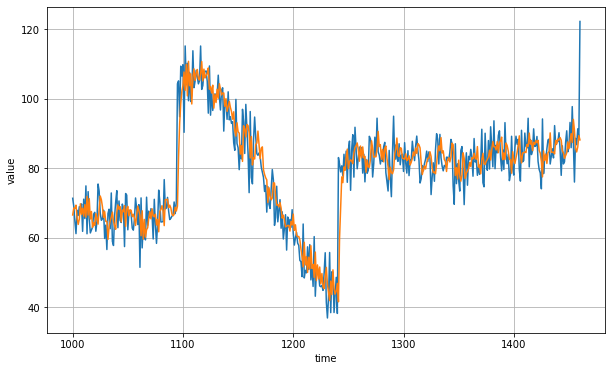

In [17]:
forecast = []

#now if we would want to plot our forecasts for every point on time series relative to the 20 poits before it

for time in range(len(final_series)- window_size):
    forecast.append(model.predict(final_series[time:time + window_size][np.newaxis]))
    #iterate over the series taking slices and window size, predicting them, and adding the results to the forecast list. 
    #numpy newaxis reshape the data that is used by the model 
    
#store the final forecast by subtracting the split_time by window_size 
forecasts = forecast[split_time- window_size:] #from 980 - end 
print(forecasts)
#convert the value in numpy array for printing 
results = np.array(forecasts)[:,0,0]
print(results)

plt.figure(figsize=(10, 6))
series_print(validation_time, validation_feature)
series_print(validation_time, results)
plt.show()

- [array([[104.912445]], dtype=float32), array([[107.675255]], dtype=float32), array([[104.29823]], dtype=float32), array([[103.14137]], dtype=float32)
 - [104.912445 107.675255 104.29823  103.14137

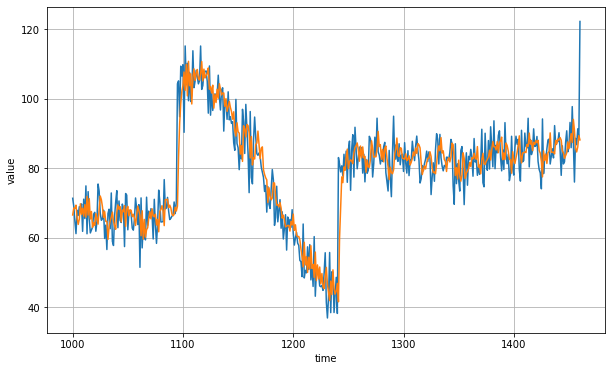

In [18]:
plt.figure(figsize=(10, 6))
series_print(validation_time, validation_feature)
series_print(validation_time, results)
plt.show()


In [19]:
#measure mae
tf.keras.metrics.mean_absolute_error(validation_feature, results).numpy()

5.0217457

#1. __Multi-layer DNN__ (3-layers)

In [20]:
dataset = windowed_dataset(train_features, window_size, shuffle_buffer_size, batch_size)

In [21]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape = [window_size], activation = 'relu' ),
    tf.keras.layers.Dense(10, activation ='relu'),
    tf.keras.layers.Dense(1)
])
model1.compile(loss = 'mse', optimizer =tf.keras.optimizers.SGD(lr = 1e-6, momentum = 0.9))
model1.fit(dataset, epochs = 100, verbose = 0)

/Applications/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[array([[64.832405]], dtype=float32), array([[70.4751]], dtype=float32), array([[66.56658]], dtype=float32), array([[66.195114]], dtype=float32), array([[67.41323]], dtype=float32), array([[65.31788]], dtype=float32), array([[67.89245]], dtype=float32), array([[68.50256]], dtype=float32), array([[66.773796]], dtype=float32), array([[65.50202]], dtype=float32), array([[67.74755]], dtype=float32), array([[67.40428]], dtype=float32), array([[66.40412]], dtype=float32), array([[67.76665]], dtype=float32), array([[67.14005]], dtype=float32), array([[68.19056]], dtype=float32), array([[68.020775]], dtype=float32), array([[66.32057]], dtype=float32), array([[63.96472]], dtype=float32), array([[66.74042]], dtype=float32), array([[63.25616]], dtype=float32), array([[65.40657]], dtype=float32), array([[62.648556]], dtype=float32), array([[62.186665]], dtype=float32), array([[66.74386]], dtype=float32), array([[69.115425]], dtype=float32), array([[68.57869]], dtype=float32), array([[65.09719]], d

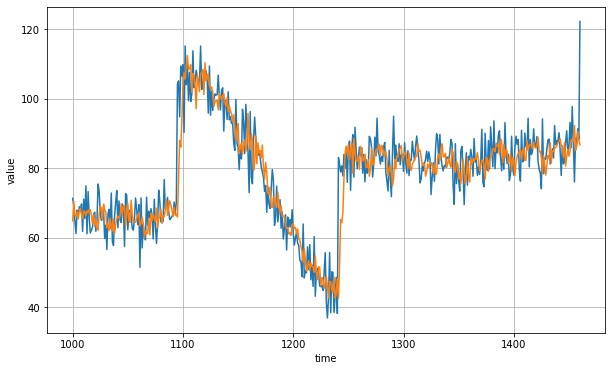

In [22]:
forecast = []

for time in range(len(final_series)- window_size):
    forecast.append(model1.predict(final_series[time:time + window_size][np.newaxis]))
    
forecasts = forecast[split_time- window_size:] 
print(forecasts)
results = np.array(forecasts)[:,0,0]
print(results)


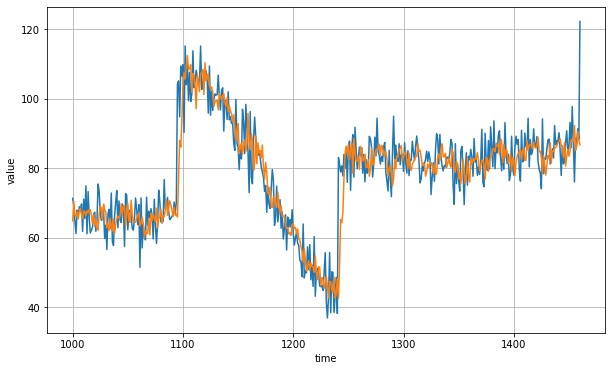

In [24]:
plt.figure(figsize=(10, 6))
series_print(validation_time, validation_feature)
series_print(validation_time, results)
plt.show()

In [25]:
#measure mae
tf.keras.metrics.mean_absolute_error(validation_feature, results).numpy()

5.1591163

##### Using callbacks:
But it's also a somewhat a stab in the dark, particularly with the optimizer function. Wouldn't it be nice if we could pick the optimal learning rate instead of the one that we chose? We might learn more efficiently and build a better model. Now let's look at a technique for that that uses callbacks that you used way back in the first course.

In [26]:

#above function will update the learnign rate at each epoch 
#epoch 1 : lr = 1e-8 *10 (1/20)

dataset = windowed_dataset(train_features, window_size, shuffle_buffer_size, batch_size)

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape = [window_size], activation = 'relu' ),
    tf.keras.layers.Dense(10, activation ='relu'),
    tf.keras.layers.Dense(1)
])

#compiling 3 layes DNN again
optimizer = tf.keras.optimizers.SGD(lr = 1e-8, momentum= 0.9)
model1.compile(loss ='mse', optimizer = optimizer)

# setting up the learning rate sceduler 
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
                lambda epoch: 1e-8 *10 **(epoch/20))

history = model1.fit(dataset, epochs =100 , callbacks= [lr_schedule],verbose = 0)

/Applications/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


(1e-08, 0.001, 0.0, 300.0)

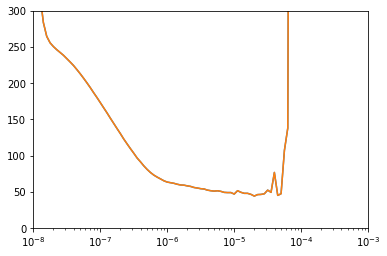

In [35]:
#after training with callbacks we can find the optimal loss by plotting loss per epoch against learnining rate per epoch
lrs = 1e-8 *(10 ** (np.arange(100)/ 20))
plt.semilogx(lrs, history.history["loss"])
min(plt.semilogx(lrs, history.history["loss"]))
plt.axis([1e-8, 1e-3, 0, 300])

In [30]:
#selected optimum value is 2e-5

In [53]:
window_size = 30
dataset = windowed_dataset(train_features, window_size, shuffle_buffer_size, batch_size)

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape = [window_size], activation = 'relu' ),
    tf.keras.layers.Dense(10, activation ='relu'),
    tf.keras.layers.Dense(1)
])

model1.compile(loss ='mse', optimizer = tf.keras.optimizers.SGD(lr = 1e-5, momentum= 0.9))

history1 = model1.fit(dataset, epochs =500 ,verbose = 0)

500
range(0, 500)


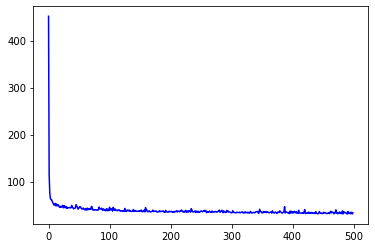

In [54]:
# After selecting an optimal value for learning rate 
loss = history1.history['loss']
print(len(loss))
epochs = range (len(loss))
print(epochs)
plt.plot(epochs , loss, 'b', label = 'training loss')
plt.show()


In [55]:
forecast = []

for time in range(len(final_series)- window_size):
    forecast.append(model1.predict(final_series[time:time + window_size][np.newaxis]))
    
forecasts = forecast[split_time- window_size:] 
print(forecasts)
results = np.array(forecasts)[:,0,0]
print(results)

plt.figure(figsize=(10, 6))
series_print(validation_time, validation_feature)
series_print(validation_time, results)
plt.show()

[array([[59.90483]], dtype=float32), array([[65.373604]], dtype=float32), array([[63.384995]], dtype=float32), array([[63.55762]], dtype=float32), array([[62.110977]], dtype=float32), array([[62.746506]], dtype=float32), array([[62.22935]], dtype=float32), array([[63.30419]], dtype=float32), array([[64.790665]], dtype=float32), array([[64.36278]], dtype=float32), array([[62.923954]], dtype=float32), array([[64.538376]], dtype=float32), array([[64.8251]], dtype=float32), array([[66.00795]], dtype=float32), array([[63.952995]], dtype=float32), array([[66.44365]], dtype=float32), array([[63.336155]], dtype=float32), array([[64.18526]], dtype=float32), array([[64.107155]], dtype=float32), array([[65.832886]], dtype=float32), array([[62.226646]], dtype=float32), array([[64.863235]], dtype=float32), array([[63.130352]], dtype=float32), array([[63.609455]], dtype=float32), array([[64.61321]], dtype=float32), array([[65.2377]], dtype=float32), array([[64.2463]], dtype=float32), array([[63.4939

In [60]:
tf.keras.metrics.mean_absolute_error(validation_feature, results).numpy()

5.2784653

#3. __RNN__ (3-layers)

- will build an RNN that contains two recurrent layers and a final dense layer, which will serve as the output. With an RNN, you can feed it in batches of sequences, and it will output a batch of forecasts, just like we did in DNN. One difference will be that the full input shape when using RNNs is three-dimensional. The first dimension will be the batch size, the second will be the timestamps, and the third is the dimensionality of the inputs at each time step. 

- LSTMs and recurrent neural networks should be able to capture pieces of information in sequences which whose importance are based on their position, for example: a recent event may be more predictive of a new event than an event which happened a a while ago.
- 🔑 In Keras, Lambda layers allow you to write arbitrary pieces of code (like preprocessing functions) into the model itself.
    - Rather than writing a scaling function on its own, you can create it as part of the network itself.
- In Keras, when stacking one RNN on top of another, the default behaviour is to output a vector (sequence-to-vector).
    - If you want RNN layers in Keras to return sequences, you have to set `return_sequences=True` in the layer.

In [64]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [66]:
train_set = windowed_dataset(train_features, window_size, shuffule_buffer=shuffle_buffer_size, batch_size=128)
train_features, window_size, shuffle_buffer_size, batch_size
model = tf.keras.models.Sequential([
    #adding a 3rd diemension
#If you recall when we wrote the window dataset helper function,
#     it returned two-dimensional batches of Windows on the data, 
#     with the first being the batch size and the second the number of timestamps. 
#     But an RNN expects three-dimensions; batch size, the number of timestamps, 
#     and the series dimensionality. With the Lambda layer, 
#     we can fix this without rewriting our Window dataset helper function. 
#     Using the Lambda, we just expand the array by one dimension. 
#     By setting input shape to none, we're saying that the model can take 
#     sequences of any length. 

  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
    
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

/Applications/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
8/8 [==============================] - 1s 9ms/step - loss: 28.5389 - mae: 29.0340
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 28.2938 - mae: 28.7887
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 27.9114 - mae: 28.4058
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 27.4482 - mae: 27.9443
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 26.9258 - mae: 27.4222
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 26.3735 - mae: 26.8691
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 25.7777 - mae: 26.2739
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 25.1309 - mae: 25.6284
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 24.4826 - mae: 24.9797
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 23.7664 - mae: 24.2647
Epoch 11/100
8/8 [==============================] - 0s 6ms/

8/8 [==============================] - 0s 6ms/step - loss: 21.6669 - mae: 22.1638
Epoch 88/100
8/8 [==============================] - 0s 6ms/step - loss: 17.3830 - mae: 17.8782
Epoch 89/100
8/8 [==============================] - 0s 6ms/step - loss: 19.6600 - mae: 20.1549
Epoch 90/100
8/8 [==============================] - 0s 6ms/step - loss: 17.2707 - mae: 17.7659
Epoch 91/100
8/8 [==============================] - 0s 6ms/step - loss: 17.7031 - mae: 18.1968
Epoch 92/100
8/8 [==============================] - 0s 6ms/step - loss: 22.7319 - mae: 23.2274
Epoch 93/100
8/8 [==============================] - 0s 6ms/step - loss: 40.1344 - mae: 40.6325
Epoch 94/100
8/8 [==============================] - 0s 6ms/step - loss: 33.7309 - mae: 34.2284
Epoch 95/100
8/8 [==============================] - 0s 6ms/step - loss: 46.6288 - mae: 47.1282
Epoch 96/100
8/8 [==============================] - 0s 6ms/step - loss: 58.8548 - mae: 59.3546
Epoch 97/100
8/8 [==============================] - 0s 6ms/step

(1e-08, 0.0001, 0.0, 30.0)

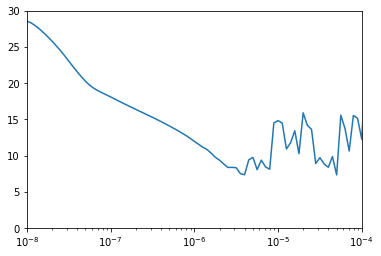

In [67]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [73]:
#selected optimum value is 7e-5
window_size = 30
dataset = windowed_dataset(train_features, window_size, shuffle_buffer_size, batch_size)

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])
optimizer = tf.keras.optimizers.SGD(lr=7e-5, momentum=0.9)
model1.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history1 = model1.fit(dataset, epochs =500)

/Applications/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/500
31/31 [==============================] - 1s 7ms/step - loss: 36.6057 - mae: 37.1027
Epoch 2/500
31/31 [==============================] - 0s 6ms/step - loss: 17.0167 - mae: 17.5089
Epoch 3/500
31/31 [==============================] - 0s 6ms/step - loss: 14.1858 - mae: 14.6776
Epoch 4/500
31/31 [==============================] - 0s 6ms/step - loss: 14.5652 - mae: 15.0609
Epoch 5/500
31/31 [==============================] - 0s 6ms/step - loss: 12.0186 - mae: 12.5098
Epoch 6/500
31/31 [==============================] - 0s 6ms/step - loss: 16.4059 - mae: 16.8990
Epoch 7/500
31/31 [==============================] - 0s 6ms/step - loss: 12.5389 - mae: 13.0309
Epoch 8/500
31/31 [==============================] - 0s 6ms/step - loss: 18.4899 - mae: 18.9853
Epoch 9/500
31/31 [==============================] - 0s 7ms/step - loss: 14.5666 - mae: 15.0601
Epoch 10/500
31/31 [==============================] - 0s 6ms/step - loss: 14.2837 - mae: 14.7776
Epoch 11/500
31/31 [===================

31/31 [==============================] - 0s 7ms/step - loss: 4.9935 - mae: 5.4679
Epoch 87/500
31/31 [==============================] - 0s 8ms/step - loss: 4.7270 - mae: 5.2062
Epoch 88/500
31/31 [==============================] - 0s 8ms/step - loss: 5.1745 - mae: 5.6551
Epoch 89/500
31/31 [==============================] - 0s 7ms/step - loss: 4.8192 - mae: 5.2983
Epoch 90/500
31/31 [==============================] - 0s 7ms/step - loss: 4.8122 - mae: 5.2896
Epoch 91/500
31/31 [==============================] - 0s 8ms/step - loss: 6.4101 - mae: 6.8951
Epoch 92/500
31/31 [==============================] - 0s 11ms/step - loss: 4.8405 - mae: 5.3232
Epoch 93/500
31/31 [==============================] - 1s 15ms/step - loss: 4.9761 - mae: 5.4561
Epoch 94/500
31/31 [==============================] - 1s 13ms/step - loss: 4.8385 - mae: 5.3212
Epoch 95/500
31/31 [==============================] - 0s 9ms/step - loss: 4.8991 - mae: 5.3721
Epoch 96/500
31/31 [==============================] - 0s 9ms

31/31 [==============================] - 0s 8ms/step - loss: 4.8031 - mae: 5.2858
Epoch 172/500
31/31 [==============================] - 0s 7ms/step - loss: 4.5706 - mae: 5.0512
Epoch 173/500
31/31 [==============================] - 0s 9ms/step - loss: 4.2721 - mae: 4.7497
Epoch 174/500
31/31 [==============================] - 0s 7ms/step - loss: 4.0576 - mae: 4.5337
Epoch 175/500
31/31 [==============================] - 0s 7ms/step - loss: 4.8576 - mae: 5.3371
Epoch 176/500
31/31 [==============================] - 0s 7ms/step - loss: 5.6828 - mae: 6.1648
Epoch 177/500
31/31 [==============================] - 0s 9ms/step - loss: 4.5269 - mae: 5.0041
Epoch 178/500
31/31 [==============================] - 0s 9ms/step - loss: 4.5561 - mae: 5.0304
Epoch 179/500
31/31 [==============================] - 0s 9ms/step - loss: 4.0582 - mae: 4.5352
Epoch 180/500
31/31 [==============================] - 0s 7ms/step - loss: 5.2607 - mae: 5.7428
Epoch 181/500
31/31 [==============================] -

31/31 [==============================] - 0s 8ms/step - loss: 4.0778 - mae: 4.5525
Epoch 257/500
31/31 [==============================] - 0s 8ms/step - loss: 4.6436 - mae: 5.1159
Epoch 258/500
31/31 [==============================] - 0s 9ms/step - loss: 4.2896 - mae: 4.7628
Epoch 259/500
31/31 [==============================] - 0s 8ms/step - loss: 4.0059 - mae: 4.4765
Epoch 260/500
31/31 [==============================] - 0s 8ms/step - loss: 3.8170 - mae: 4.2865
Epoch 261/500
31/31 [==============================] - 0s 11ms/step - loss: 4.0067 - mae: 4.4829
Epoch 262/500
31/31 [==============================] - 0s 7ms/step - loss: 4.1505 - mae: 4.6279
Epoch 263/500
31/31 [==============================] - 0s 8ms/step - loss: 3.9852 - mae: 4.4534
Epoch 264/500
31/31 [==============================] - 0s 8ms/step - loss: 4.0704 - mae: 4.5439
Epoch 265/500
31/31 [==============================] - 0s 8ms/step - loss: 3.8593 - mae: 4.3312
Epoch 266/500
31/31 [==============================] 

31/31 [==============================] - 0s 7ms/step - loss: 4.1221 - mae: 4.5982
Epoch 342/500
31/31 [==============================] - 0s 6ms/step - loss: 4.6037 - mae: 5.0857
Epoch 343/500
31/31 [==============================] - 0s 7ms/step - loss: 3.6594 - mae: 4.1346
Epoch 344/500
31/31 [==============================] - 0s 7ms/step - loss: 4.0026 - mae: 4.4750
Epoch 345/500
31/31 [==============================] - 1s 14ms/step - loss: 3.6592 - mae: 4.1313
Epoch 346/500
31/31 [==============================] - 0s 10ms/step - loss: 3.2373 - mae: 3.6983
Epoch 347/500
31/31 [==============================] - 0s 11ms/step - loss: 3.5501 - mae: 4.0204
Epoch 348/500
31/31 [==============================] - 0s 12ms/step - loss: 3.1828 - mae: 3.6458
Epoch 349/500
31/31 [==============================] - 0s 7ms/step - loss: 3.3218 - mae: 3.7832
Epoch 350/500
31/31 [==============================] - 0s 8ms/step - loss: 3.9571 - mae: 4.4328
Epoch 351/500
31/31 [=============================

31/31 [==============================] - 0s 7ms/step - loss: 4.3872 - mae: 4.8658
Epoch 427/500
31/31 [==============================] - 0s 7ms/step - loss: 3.4946 - mae: 3.9653
Epoch 428/500
31/31 [==============================] - 0s 6ms/step - loss: 3.6857 - mae: 4.1583
Epoch 429/500
31/31 [==============================] - 0s 6ms/step - loss: 3.7034 - mae: 4.1732
Epoch 430/500
31/31 [==============================] - 0s 6ms/step - loss: 3.4515 - mae: 3.9181
Epoch 431/500
31/31 [==============================] - 0s 7ms/step - loss: 3.5264 - mae: 3.9993
Epoch 432/500
31/31 [==============================] - 0s 6ms/step - loss: 3.3338 - mae: 3.8054
Epoch 433/500
31/31 [==============================] - 0s 6ms/step - loss: 3.5114 - mae: 3.9824
Epoch 434/500
31/31 [==============================] - 0s 6ms/step - loss: 3.1631 - mae: 3.6301
Epoch 435/500
31/31 [==============================] - 0s 6ms/step - loss: 3.3968 - mae: 3.8663
Epoch 436/500
31/31 [==============================] -

- The Huber Loss function is a combination of MSE and MAE, it's less sensitive to outliers. You can use it in TensorFlow with: `tf.keras.losses.Huber()`

In [74]:
forecast = []

for time in range(len(final_series)- window_size):
    forecast.append(model1.predict(final_series[time:time + window_size][np.newaxis]))
    
forecasts = forecast[split_time- window_size:] 
print(forecasts)
results = np.array(forecasts)[:,0,0]
print(results)

plt.figure(figsize=(10, 6))
series_print(validation_time, validation_feature)
series_print(validation_time, results)
plt.show()

[array([[70.95028]], dtype=float32), array([[70.265236]], dtype=float32), array([[71.68564]], dtype=float32), array([[79.04389]], dtype=float32), array([[65.78937]], dtype=float32), array([[63.86706]], dtype=float32), array([[68.067154]], dtype=float32), array([[63.843216]], dtype=float32), array([[72.86411]], dtype=float32), array([[70.642784]], dtype=float32), array([[65.127686]], dtype=float32), array([[71.00084]], dtype=float32), array([[74.24705]], dtype=float32), array([[71.34565]], dtype=float32), array([[61.731434]], dtype=float32), array([[66.39607]], dtype=float32), array([[67.13988]], dtype=float32), array([[62.601097]], dtype=float32), array([[60.61858]], dtype=float32), array([[70.49752]], dtype=float32), array([[69.17808]], dtype=float32), array([[74.10905]], dtype=float32), array([[68.236176]], dtype=float32), array([[70.29749]], dtype=float32), array([[67.581375]], dtype=float32), array([[67.73543]], dtype=float32), array([[77.50104]], dtype=float32), array([[69.36952]]

In [75]:
tf.keras.metrics.mean_absolute_error(validation_feature, results).numpy()

7.287549

- performence actually degraded compared to DNN
- you can see a plateu forming in the prediction so' let's try out LSTM 

#4 __LSTM__

In [85]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [86]:
dataset = windowed_dataset(train_features, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 21.4925 - mae: 21.9875
Epoch 2/100
1/1 [==============================] - 0s 262ms/step - loss: 21.4914 - mae: 21.9863
Epoch 3/100
1/1 [==============================] - 0s 258ms/step - loss: 21.4890 - mae: 21.9840
Epoch 4/100
1/1 [==============================] - 0s 253ms/step - loss: 21.4855 - mae: 21.9805
Epoch 5/100
1/1 [==============================] - 0s 253ms/step - loss: 21.4807 - mae: 21.9756
Epoch 6/100
1/1 [==============================] - 0s 253ms/step - loss: 21.4745 - mae: 21.9695
Epoch 7/100
1/1 [==============================] - 0s 259ms/step - loss: 21.4669 - mae: 21.9619
Epoch 8/100
1/1 [==============================] - 0s 255ms/step - loss: 21.4578 - mae: 21.9528
Epoch 9/100
1/1 [==============================] - 0s 250ms/step - loss: 21.4470 - mae: 21.9420
Epoch 10/100
1/1 [==============================] - 0s 266ms/step - loss: 21.4345 - mae: 21.9295
Epoch 11/100
1/1 [========================

1/1 [==============================] - 0s 319ms/step - loss: 6.5685 - mae: 7.0531
Epoch 86/100
1/1 [==============================] - 0s 278ms/step - loss: 6.5289 - mae: 7.0085
Epoch 87/100
1/1 [==============================] - 0s 319ms/step - loss: 8.1054 - mae: 8.5901
Epoch 88/100
1/1 [==============================] - 0s 350ms/step - loss: 19.7789 - mae: 20.2778
Epoch 89/100
1/1 [==============================] - 0s 414ms/step - loss: 8.1691 - mae: 8.6541
Epoch 90/100
1/1 [==============================] - 0s 339ms/step - loss: 7.8252 - mae: 8.3144
Epoch 91/100
1/1 [==============================] - 0s 283ms/step - loss: 20.9474 - mae: 21.4460
Epoch 92/100
1/1 [==============================] - 0s 299ms/step - loss: 25.0807 - mae: 25.5792
Epoch 93/100
1/1 [==============================] - 0s 304ms/step - loss: 9.0556 - mae: 9.5480
Epoch 94/100
1/1 [==============================] - 0s 327ms/step - loss: 45.4594 - mae: 45.9593
Epoch 95/100
1/1 [==============================] - 0s 

(1e-08, 0.1, 0.0, 30.0)

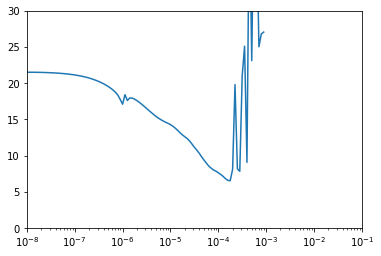

In [88]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-1, 0, 30])

In [98]:
#let's take the optimal value as 9e-3
tf.keras.backend.clear_session()
dataset = windowed_dataset(train_features, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=500,verbose=2)

Epoch 1/500
1/1 - 6s - loss: 31.0139 - mae: 31.5131
Epoch 2/500
1/1 - 0s - loss: 16.8716 - mae: 17.3690
Epoch 3/500
1/1 - 0s - loss: 23.6028 - mae: 24.1000
Epoch 4/500
1/1 - 0s - loss: 13.5489 - mae: 14.0415
Epoch 5/500
1/1 - 0s - loss: 20.1024 - mae: 20.5998
Epoch 6/500
1/1 - 0s - loss: 16.2550 - mae: 16.7501
Epoch 7/500
1/1 - 0s - loss: 13.2856 - mae: 13.7796
Epoch 8/500
1/1 - 0s - loss: 17.5768 - mae: 18.0734
Epoch 9/500
1/1 - 0s - loss: 11.8293 - mae: 12.3209
Epoch 10/500
1/1 - 0s - loss: 12.8363 - mae: 13.3271
Epoch 11/500
1/1 - 0s - loss: 13.8081 - mae: 14.3007
Epoch 12/500
1/1 - 0s - loss: 9.6650 - mae: 10.1574
Epoch 13/500
1/1 - 0s - loss: 12.7250 - mae: 13.2192
Epoch 14/500
1/1 - 0s - loss: 9.8955 - mae: 10.3880
Epoch 15/500
1/1 - 0s - loss: 10.4776 - mae: 10.9667
Epoch 16/500
1/1 - 0s - loss: 9.5716 - mae: 10.0622
Epoch 17/500
1/1 - 0s - loss: 9.6484 - mae: 10.1394
Epoch 18/500
1/1 - 0s - loss: 9.9558 - mae: 10.4489
Epoch 19/500
1/1 - 0s - loss: 8.0648 - mae: 8.5494
Epoch 20/

1/1 - 0s - loss: 4.5029 - mae: 4.9762
Epoch 161/500
1/1 - 0s - loss: 4.4517 - mae: 4.9264
Epoch 162/500
1/1 - 0s - loss: 4.5106 - mae: 4.9902
Epoch 163/500
1/1 - 0s - loss: 4.5834 - mae: 5.0573
Epoch 164/500
1/1 - 0s - loss: 4.7465 - mae: 5.2214
Epoch 165/500
1/1 - 0s - loss: 4.8772 - mae: 5.3542
Epoch 166/500
1/1 - 0s - loss: 5.0227 - mae: 5.5013
Epoch 167/500
1/1 - 0s - loss: 5.1110 - mae: 5.5914
Epoch 168/500
1/1 - 0s - loss: 5.0848 - mae: 5.5666
Epoch 169/500
1/1 - 0s - loss: 4.8689 - mae: 5.3468
Epoch 170/500
1/1 - 0s - loss: 4.7179 - mae: 5.1939
Epoch 171/500
1/1 - 0s - loss: 4.5253 - mae: 4.9977
Epoch 172/500
1/1 - 0s - loss: 4.4405 - mae: 4.9197
Epoch 173/500
1/1 - 0s - loss: 4.4351 - mae: 4.9132
Epoch 174/500
1/1 - 0s - loss: 4.4968 - mae: 4.9701
Epoch 175/500
1/1 - 0s - loss: 4.6236 - mae: 5.0953
Epoch 176/500
1/1 - 0s - loss: 4.7166 - mae: 5.1915
Epoch 177/500
1/1 - 0s - loss: 4.8343 - mae: 5.3072
Epoch 178/500
1/1 - 0s - loss: 4.8980 - mae: 5.3763
Epoch 179/500
1/1 - 0s - l

Epoch 318/500
1/1 - 0s - loss: 4.3837 - mae: 4.8626
Epoch 319/500
1/1 - 0s - loss: 4.3988 - mae: 4.8701
Epoch 320/500
1/1 - 0s - loss: 4.4440 - mae: 4.9196
Epoch 321/500
1/1 - 0s - loss: 4.5076 - mae: 4.9831
Epoch 322/500
1/1 - 0s - loss: 4.6616 - mae: 5.1354
Epoch 323/500
1/1 - 0s - loss: 4.9272 - mae: 5.4074
Epoch 324/500
1/1 - 0s - loss: 5.2411 - mae: 5.7240
Epoch 325/500
1/1 - 0s - loss: 5.2498 - mae: 5.7282
Epoch 326/500
1/1 - 0s - loss: 5.0383 - mae: 5.5189
Epoch 327/500
1/1 - 0s - loss: 4.7296 - mae: 5.2082
Epoch 328/500
1/1 - 0s - loss: 4.5492 - mae: 5.0245
Epoch 329/500
1/1 - 0s - loss: 4.3875 - mae: 4.8588
Epoch 330/500
1/1 - 0s - loss: 4.3211 - mae: 4.8006
Epoch 331/500
1/1 - 0s - loss: 4.3220 - mae: 4.8007
Epoch 332/500
1/1 - 0s - loss: 4.3675 - mae: 4.8435
Epoch 333/500
1/1 - 0s - loss: 4.4417 - mae: 4.9180
Epoch 334/500
1/1 - 0s - loss: 4.4924 - mae: 4.9654
Epoch 335/500
1/1 - 0s - loss: 4.5391 - mae: 5.0114
Epoch 336/500
1/1 - 0s - loss: 4.5068 - mae: 4.9818
Epoch 337/50

Epoch 476/500
1/1 - 0s - loss: 4.2494 - mae: 4.7274
Epoch 477/500
1/1 - 0s - loss: 4.2525 - mae: 4.7314
Epoch 478/500
1/1 - 0s - loss: 4.2572 - mae: 4.7336
Epoch 479/500
1/1 - 0s - loss: 4.2736 - mae: 4.7523
Epoch 480/500
1/1 - 0s - loss: 4.3141 - mae: 4.7857
Epoch 481/500
1/1 - 0s - loss: 4.4383 - mae: 4.9100
Epoch 482/500
1/1 - 0s - loss: 4.8354 - mae: 5.3142
Epoch 483/500
1/1 - 1s - loss: 5.7196 - mae: 6.2066
Epoch 484/500
1/1 - 1s - loss: 5.9423 - mae: 6.4290
Epoch 485/500
1/1 - 1s - loss: 5.3301 - mae: 5.8125
Epoch 486/500
1/1 - 0s - loss: 4.5861 - mae: 5.0633
Epoch 487/500
1/1 - 0s - loss: 4.3372 - mae: 4.8145
Epoch 488/500
1/1 - 0s - loss: 4.2580 - mae: 4.7342
Epoch 489/500
1/1 - 0s - loss: 4.3231 - mae: 4.7930
Epoch 490/500
1/1 - 0s - loss: 4.5490 - mae: 5.0224
Epoch 491/500
1/1 - 0s - loss: 4.9590 - mae: 5.4395
Epoch 492/500
1/1 - 0s - loss: 5.2587 - mae: 5.7445
Epoch 493/500
1/1 - 0s - loss: 5.1750 - mae: 5.6560
Epoch 494/500
1/1 - 0s - loss: 4.7573 - mae: 5.2301
Epoch 495/50

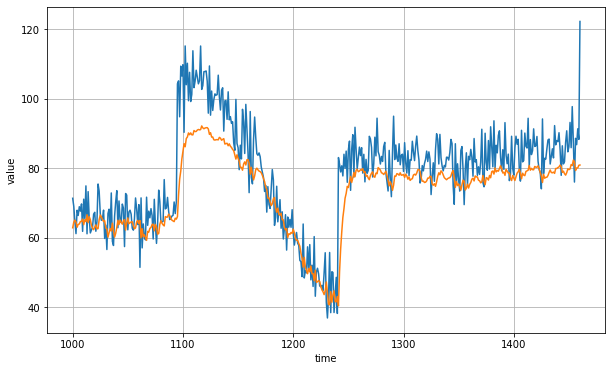

In [99]:
forecast = []
results = []
for time in range(len(final_series) - window_size):
    forecast.append(model.predict(final_series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

series_print(validation_time, validation_feature)
series_print(validation_time, results)
plt.show()

In [100]:
tf.keras.metrics.mean_absolute_error(validation_feature, results).numpy()

6.892972

it is a bit better than RNN - try adding one more layer to LSTM and check if it still improves 

In [101]:
tf.keras.backend.clear_session()
dataset = windowed_dataset(train_features, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=500,verbose=2)

/Applications/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/500
1/1 - 9s - loss: 42.6444 - mae: 43.1442
Epoch 2/500
1/1 - 0s - loss: 24.0038 - mae: 24.4977
Epoch 3/500
1/1 - 0s - loss: 17.4035 - mae: 17.8990
Epoch 4/500
1/1 - 0s - loss: 27.0123 - mae: 27.5106
Epoch 5/500
1/1 - 0s - loss: 27.6900 - mae: 28.1867
Epoch 6/500
1/1 - 0s - loss: 19.1009 - mae: 19.5970
Epoch 7/500
1/1 - 0s - loss: 13.7967 - mae: 14.2882
Epoch 8/500
1/1 - 0s - loss: 19.1557 - mae: 19.6506
Epoch 9/500
1/1 - 0s - loss: 20.8236 - mae: 21.3212
Epoch 10/500
1/1 - 0s - loss: 14.9765 - mae: 15.4668
Epoch 11/500
1/1 - 0s - loss: 12.0619 - mae: 12.5531
Epoch 12/500
1/1 - 0s - loss: 15.6269 - mae: 16.1221
Epoch 13/500
1/1 - 0s - loss: 16.5416 - mae: 17.0385
Epoch 14/500
1/1 - 0s - loss: 12.8690 - mae: 13.3629
Epoch 15/500
1/1 - 0s - loss: 10.1483 - mae: 10.6387
Epoch 16/500
1/1 - 0s - loss: 13.5871 - mae: 14.0784
Epoch 17/500
1/1 - 0s - loss: 12.8178 - mae: 13.3098
Epoch 18/500
1/1 - 0s - loss: 8.9581 - mae: 9.4392
Epoch 19/500
1/1 - 0s - loss: 11.0807 - mae: 11.5747
Epoc

Epoch 160/500
1/1 - 0s - loss: 5.1942 - mae: 5.6750
Epoch 161/500
1/1 - 0s - loss: 5.4424 - mae: 5.9250
Epoch 162/500
1/1 - 0s - loss: 5.4447 - mae: 5.9294
Epoch 163/500
1/1 - 0s - loss: 5.0979 - mae: 5.5741
Epoch 164/500
1/1 - 0s - loss: 4.8311 - mae: 5.3052
Epoch 165/500
1/1 - 0s - loss: 4.6772 - mae: 5.1521
Epoch 166/500
1/1 - 0s - loss: 4.5910 - mae: 5.0644
Epoch 167/500
1/1 - 0s - loss: 4.5514 - mae: 5.0285
Epoch 168/500
1/1 - 0s - loss: 4.5388 - mae: 5.0143
Epoch 169/500
1/1 - 0s - loss: 4.5409 - mae: 5.0163
Epoch 170/500
1/1 - 0s - loss: 4.5524 - mae: 5.0301
Epoch 171/500
1/1 - 0s - loss: 4.5776 - mae: 5.0511
Epoch 172/500
1/1 - 0s - loss: 4.6386 - mae: 5.1134
Epoch 173/500
1/1 - 0s - loss: 4.7358 - mae: 5.2128
Epoch 174/500
1/1 - 0s - loss: 4.9075 - mae: 5.3837
Epoch 175/500
1/1 - 0s - loss: 5.1560 - mae: 5.6354
Epoch 176/500
1/1 - 0s - loss: 5.3729 - mae: 5.8551
Epoch 177/500
1/1 - 0s - loss: 5.3778 - mae: 5.8618
Epoch 178/500
1/1 - 0s - loss: 5.0657 - mae: 5.5425
Epoch 179/50

Epoch 318/500
1/1 - 0s - loss: 4.8218 - mae: 5.2948
Epoch 319/500
1/1 - 0s - loss: 4.6950 - mae: 5.1694
Epoch 320/500
1/1 - 1s - loss: 4.5406 - mae: 5.0202
Epoch 321/500
1/1 - 0s - loss: 4.4296 - mae: 4.9025
Epoch 322/500
1/1 - 0s - loss: 4.4336 - mae: 4.9073
Epoch 323/500
1/1 - 0s - loss: 4.5196 - mae: 4.9980
Epoch 324/500
1/1 - 0s - loss: 4.5768 - mae: 5.0542
Epoch 325/500
1/1 - 0s - loss: 4.5721 - mae: 5.0516
Epoch 326/500
1/1 - 0s - loss: 4.5071 - mae: 4.9833
Epoch 327/500
1/1 - 0s - loss: 4.4447 - mae: 4.9224
Epoch 328/500
1/1 - 0s - loss: 4.4138 - mae: 4.8903
Epoch 329/500
1/1 - 0s - loss: 4.4111 - mae: 4.8873
Epoch 330/500
1/1 - 0s - loss: 4.4293 - mae: 4.9059
Epoch 331/500
1/1 - 0s - loss: 4.4717 - mae: 4.9485
Epoch 332/500
1/1 - 0s - loss: 4.5271 - mae: 5.0043
Epoch 333/500
1/1 - 0s - loss: 4.6034 - mae: 5.0793
Epoch 334/500
1/1 - 0s - loss: 4.6447 - mae: 5.1149
Epoch 335/500
1/1 - 0s - loss: 4.7107 - mae: 5.1860
Epoch 336/500
1/1 - 0s - loss: 4.7215 - mae: 5.1920
Epoch 337/50

Epoch 476/500
1/1 - 0s - loss: 4.4139 - mae: 4.8904
Epoch 477/500
1/1 - 0s - loss: 4.3882 - mae: 4.8631
Epoch 478/500
1/1 - 0s - loss: 4.3688 - mae: 4.8448
Epoch 479/500
1/1 - 0s - loss: 4.3581 - mae: 4.8320
Epoch 480/500
1/1 - 0s - loss: 4.3517 - mae: 4.8263
Epoch 481/500
1/1 - 0s - loss: 4.3483 - mae: 4.8225
Epoch 482/500
1/1 - 0s - loss: 4.3473 - mae: 4.8218
Epoch 483/500
1/1 - 0s - loss: 4.3478 - mae: 4.8229
Epoch 484/500
1/1 - 0s - loss: 4.3496 - mae: 4.8237
Epoch 485/500
1/1 - 0s - loss: 4.3533 - mae: 4.8280
Epoch 486/500
1/1 - 0s - loss: 4.3597 - mae: 4.8343
Epoch 487/500
1/1 - 0s - loss: 4.3713 - mae: 4.8470
Epoch 488/500
1/1 - 0s - loss: 4.3929 - mae: 4.8670
Epoch 489/500
1/1 - 0s - loss: 4.4302 - mae: 4.9049
Epoch 490/500
1/1 - 0s - loss: 4.5005 - mae: 4.9760
Epoch 491/500
1/1 - 0s - loss: 4.6523 - mae: 5.1286
Epoch 492/500
1/1 - 0s - loss: 4.8565 - mae: 5.3352
Epoch 493/500
1/1 - 0s - loss: 5.1612 - mae: 5.6408
Epoch 494/500
1/1 - 0s - loss: 5.1501 - mae: 5.6334
Epoch 495/50

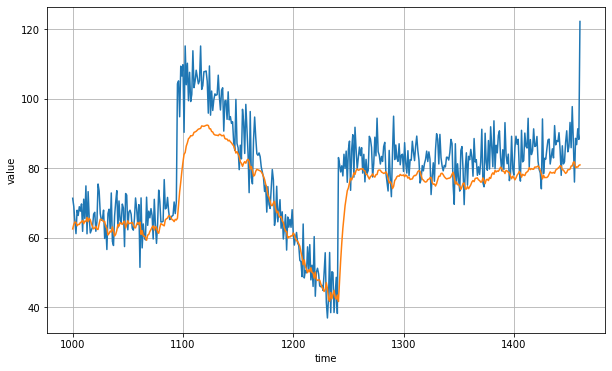

In [102]:
forecast = []
results = []
for time in range(len(final_series) - window_size):
    forecast.append(model.predict(final_series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

series_print(validation_time, validation_feature)
series_print(validation_time, results)
plt.show()

In [103]:
tf.keras.metrics.mean_absolute_error(validation_feature, results).numpy()

6.9236493

In [105]:
#So model started performing worse than before 

In [106]:
# Now looka at the impact of using convolution layers with LSTM

#5 __LSTM with Convolution__

In [55]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 

In [56]:
#creating time series fucntion with trend, noise and seasonality 

In [57]:
def trend(time, slope = 0):
    return time*slope

def seasonal_component(seasonal):
    return np.where (seasonal < 0.4,
                    np.cos(2*np.pi*seasonal),
                    1/np.exp(3*seasonal))

def seasonality(time, period, amplitude =1, phase = 0): 
    seasonal = ((time+phase) % period)/period
    return amplitude*seasonal_component(seasonal)

def noise(time, noise_level = 5, seed = None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) *noise_level

In [58]:
#making a time series
baseline = 10
time = np.arange(365*4+1, dtype ='float32')
amplitude = 40
slope = 0.05
period = 365

In [59]:
#making a plotting function for our time series 
def plot_series(time, series, format='-', start = 0, end = None ):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

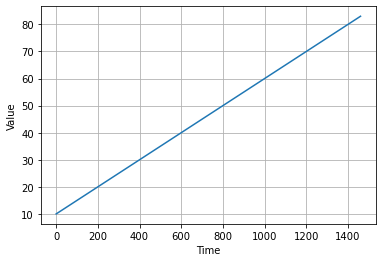

In [60]:
series1 = baseline + trend(time, slope = slope)
plot_series(time, series1)

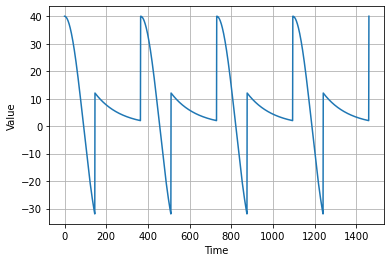

In [61]:
series2 = seasonality (time ,period , amplitude = amplitude , phase = 0)
plot_series (time , series2)

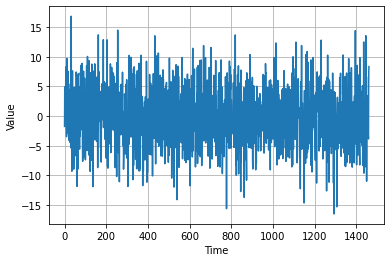

In [62]:
series3 = noise(time, noise_level = 5, seed = 32)
plot_series (time , series3)

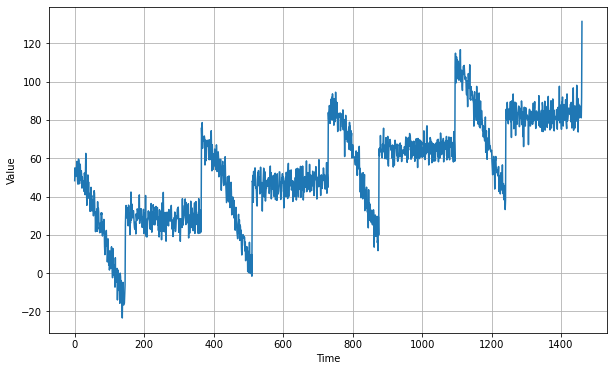

In [63]:
series = series1 + series2 + series3
plt.figure(figsize=(10,6))
plot_series (time , series)

In [89]:
series

array([ 48.25552775,  54.96258836,  52.9809081 , ...,  81.06815507,
        91.74085732, 131.3428113 ])

In [69]:
# defining windowed function to create an input that can be sent to the model 
window_size=20
batch_size = 32
shuffle_buffer = 1000

#splitting data in to train and test 
split_value = 1000
train_data = series[split_value:]
train_time = time[:split_value]
validation_data = series[split_value:]
validation_time = time[split_value:] 

def windowed_function(series, window_size, shuffle_buffer, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size+1, shift=1, drop_remainder=True) #- window_size 5 
    dataset = dataset.flat_map(lambda x : x.batch(window_size+1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda x: (x[:-1], x[-1]))
    dataset = dataset.batch(batch_size).prefetch(1) #-> batch_size - 8
    return dataset

In [34]:
# 1400 - 1000 train - 400 test 
# 1 epoch - 32 batches 20 elements,  each tensor is having around 32 batches and each batch have window size of 20 values 
# 1000/20 - 50 batches  44 32 *20*44 

In [96]:
# window_size = 5
# 40.88205978  27.42939816  23.49058138  22.73343769  11.92018881 - > next value in sequence is y -7.29199173
# batch_size = 8
# shape of each tensor ->  batch_size*window_size

In [73]:
#model architecture 
dataset = windowed_function(train_data, window_size, shuffle_buffer, batch_size)    

# If you recall when we wrote the window dataset helper function, it returned two-dimensional batches of Windows on 
# the data, with the first being the batch size and the second the number of timestamps. But an RNN expects 
# three-dimensions; batch size, the number of timestamps, and the series dimensionality.
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), 
                                                          input_shape = [None]),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                                    tf.keras.layers.Dense(1),
# The default activation function in the RNN layers is tan H which is the hyperbolic tangent activation. 
# This outputs values between negative one and one. Since the time series values are in that order usually in the 
# 10s like 40s, 50s, 60s, and 70s, then scaling up the outputs to the same ballpark can help us with learning
                                    tf.keras.layers.Lambda(lambda x: x*100.0)
])


lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-8 * 10**(x / 20))
optimizer = tf.keras.optimizers.SGD(lr = 1e-8, momentum = 0.9)
model.compile(loss = tf.keras.losses.Huber(), optimizer = optimizer, metrics = ['mae'])
history = model.fit(dataset, epochs = 100, verbose = 2, callbacks = [lr_callback])

Epoch 1/100
14/14 - 5s - loss: 88.1850 - mae: 88.6850
Epoch 2/100
14/14 - 0s - loss: 87.9347 - mae: 88.4347
Epoch 3/100
14/14 - 0s - loss: 87.5829 - mae: 88.0829
Epoch 4/100
14/14 - 0s - loss: 87.1716 - mae: 87.6716
Epoch 5/100
14/14 - 0s - loss: 86.7066 - mae: 87.2066
Epoch 6/100
14/14 - 0s - loss: 86.1834 - mae: 86.6834
Epoch 7/100
14/14 - 0s - loss: 85.5967 - mae: 86.0967
Epoch 8/100
14/14 - 0s - loss: 84.9378 - mae: 85.4378
Epoch 9/100
14/14 - 0s - loss: 84.1987 - mae: 84.6987
Epoch 10/100
14/14 - 0s - loss: 83.3696 - mae: 83.8696
Epoch 11/100
14/14 - 0s - loss: 82.4383 - mae: 82.9383
Epoch 12/100
14/14 - 0s - loss: 81.3935 - mae: 81.8935
Epoch 13/100
14/14 - 0s - loss: 80.2203 - mae: 80.7203
Epoch 14/100
14/14 - 0s - loss: 78.9028 - mae: 79.4028
Epoch 15/100
14/14 - 0s - loss: 77.4232 - mae: 77.9232
Epoch 16/100
14/14 - 0s - loss: 75.7603 - mae: 76.2603
Epoch 17/100
14/14 - 0s - loss: 73.8913 - mae: 74.3913
Epoch 18/100
14/14 - 0s - loss: 71.7883 - mae: 72.2883
Epoch 19/100
14/14 

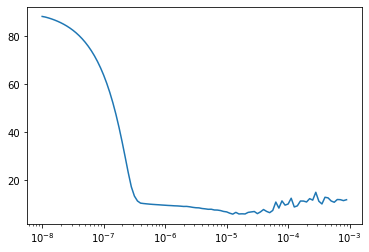

In [75]:
plt.semilogx(history.history["lr"], history.history['loss'])
plt.show()

In [78]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)


#the value settles down somwhere around 10**-5
dataset = windowed_function(train_data, window_size, shuffle_buffer, batch_size)    

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), 
                                                          input_shape = [None]),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                                    tf.keras.layers.Dense(1),
                                    tf.keras.layers.Lambda(lambda x: x*100.0)
                                    ])

model.compile(optimizer=tf.keras.optimizers.SGD(lr = 1e-5 , momentum= 0.9),
    loss=tf.keras.losses.Huber(),
              metrics=['mae'])

model.fit(dataset, epochs = 500, verbose = 2)


Epoch 1/500
14/14 - 5s - loss: 25.7168 - mae: 26.2112
Epoch 2/500
14/14 - 0s - loss: 13.2853 - mae: 13.7812
Epoch 3/500
14/14 - 0s - loss: 10.8577 - mae: 11.3472
Epoch 4/500
14/14 - 0s - loss: 10.1095 - mae: 10.5997
Epoch 5/500
14/14 - 0s - loss: 9.8921 - mae: 10.3788
Epoch 6/500
14/14 - 0s - loss: 9.7899 - mae: 10.2773
Epoch 7/500
14/14 - 0s - loss: 9.2973 - mae: 9.7906
Epoch 8/500
14/14 - 0s - loss: 9.1511 - mae: 9.6397
Epoch 9/500
14/14 - 0s - loss: 8.7497 - mae: 9.2391
Epoch 10/500
14/14 - 0s - loss: 8.4605 - mae: 8.9482
Epoch 11/500
14/14 - 0s - loss: 8.1682 - mae: 8.6575
Epoch 12/500
14/14 - 0s - loss: 8.0444 - mae: 8.5320
Epoch 13/500
14/14 - 0s - loss: 7.8101 - mae: 8.2997
Epoch 14/500
14/14 - 0s - loss: 7.5430 - mae: 8.0260
Epoch 15/500
14/14 - 0s - loss: 7.6422 - mae: 8.1240
Epoch 16/500
14/14 - 0s - loss: 7.1835 - mae: 7.6651
Epoch 17/500
14/14 - 0s - loss: 6.9131 - mae: 7.3944
Epoch 18/500
14/14 - 0s - loss: 6.5892 - mae: 7.0768
Epoch 19/500
14/14 - 0s - loss: 6.9995 - mae:

Epoch 155/500
14/14 - 0s - loss: 4.8746 - mae: 5.3577
Epoch 156/500
14/14 - 0s - loss: 5.4260 - mae: 5.9071
Epoch 157/500
14/14 - 0s - loss: 5.0391 - mae: 5.5147
Epoch 158/500
14/14 - 0s - loss: 4.9550 - mae: 5.4277
Epoch 159/500
14/14 - 0s - loss: 5.0201 - mae: 5.4955
Epoch 160/500
14/14 - 0s - loss: 4.9291 - mae: 5.4037
Epoch 161/500
14/14 - 0s - loss: 5.3579 - mae: 5.8378
Epoch 162/500
14/14 - 0s - loss: 5.8773 - mae: 6.3555
Epoch 163/500
14/14 - 0s - loss: 5.0084 - mae: 5.4860
Epoch 164/500
14/14 - 0s - loss: 5.0569 - mae: 5.5379
Epoch 165/500
14/14 - 0s - loss: 5.5911 - mae: 6.0683
Epoch 166/500
14/14 - 0s - loss: 5.1828 - mae: 5.6640
Epoch 167/500
14/14 - 0s - loss: 5.0096 - mae: 5.4887
Epoch 168/500
14/14 - 0s - loss: 5.7184 - mae: 6.1957
Epoch 169/500
14/14 - 0s - loss: 6.4071 - mae: 6.8934
Epoch 170/500
14/14 - 0s - loss: 5.8208 - mae: 6.3001
Epoch 171/500
14/14 - 0s - loss: 4.9228 - mae: 5.4046
Epoch 172/500
14/14 - 0s - loss: 4.8696 - mae: 5.3481
Epoch 173/500
14/14 - 0s - l

Epoch 307/500
14/14 - 0s - loss: 4.7510 - mae: 5.2279
Epoch 308/500
14/14 - 0s - loss: 4.7397 - mae: 5.2171
Epoch 309/500
14/14 - 0s - loss: 4.7135 - mae: 5.1876
Epoch 310/500
14/14 - 0s - loss: 4.6810 - mae: 5.1613
Epoch 311/500
14/14 - 0s - loss: 4.6627 - mae: 5.1397
Epoch 312/500
14/14 - 0s - loss: 4.8023 - mae: 5.2761
Epoch 313/500
14/14 - 0s - loss: 4.6906 - mae: 5.1643
Epoch 314/500
14/14 - 0s - loss: 4.7227 - mae: 5.1966
Epoch 315/500
14/14 - 0s - loss: 5.1243 - mae: 5.5922
Epoch 316/500
14/14 - 0s - loss: 5.0489 - mae: 5.5253
Epoch 317/500
14/14 - 0s - loss: 5.0476 - mae: 5.5271
Epoch 318/500
14/14 - 0s - loss: 5.7306 - mae: 6.2180
Epoch 319/500
14/14 - 0s - loss: 5.0789 - mae: 5.5537
Epoch 320/500
14/14 - 0s - loss: 4.7162 - mae: 5.1924
Epoch 321/500
14/14 - 0s - loss: 5.2775 - mae: 5.7597
Epoch 322/500
14/14 - 0s - loss: 4.9731 - mae: 5.4506
Epoch 323/500
14/14 - 0s - loss: 4.8259 - mae: 5.3023
Epoch 324/500
14/14 - 0s - loss: 5.7601 - mae: 6.2414
Epoch 325/500
14/14 - 0s - l

Epoch 459/500
14/14 - 0s - loss: 4.6431 - mae: 5.1176
Epoch 460/500
14/14 - 0s - loss: 4.6910 - mae: 5.1647
Epoch 461/500
14/14 - 0s - loss: 4.7199 - mae: 5.1981
Epoch 462/500
14/14 - 0s - loss: 4.6195 - mae: 5.0997
Epoch 463/500
14/14 - 0s - loss: 4.7638 - mae: 5.2382
Epoch 464/500
14/14 - 0s - loss: 4.5712 - mae: 5.0420
Epoch 465/500
14/14 - 0s - loss: 4.7723 - mae: 5.2425
Epoch 466/500
14/14 - 0s - loss: 4.6379 - mae: 5.1200
Epoch 467/500
14/14 - 0s - loss: 5.0596 - mae: 5.5387
Epoch 468/500
14/14 - 0s - loss: 4.5412 - mae: 5.0114
Epoch 469/500
14/14 - 0s - loss: 4.8537 - mae: 5.3327
Epoch 470/500
14/14 - 0s - loss: 4.7407 - mae: 5.2150
Epoch 471/500
14/14 - 0s - loss: 4.6772 - mae: 5.1536
Epoch 472/500
14/14 - 0s - loss: 4.5835 - mae: 5.0606
Epoch 473/500
14/14 - 0s - loss: 4.7255 - mae: 5.1999
Epoch 474/500
14/14 - 0s - loss: 4.9266 - mae: 5.4083
Epoch 475/500
14/14 - 0s - loss: 5.0407 - mae: 5.5206
Epoch 476/500
14/14 - 0s - loss: 4.5948 - mae: 5.0698
Epoch 477/500
14/14 - 0s - l

In [86]:
print(len(series))
range(len(series)- window_size)

1461


range(0, 1441)

In [88]:
series[0: 0 + 20]

array([48.25552775, 54.96258836, 52.9809081 , 50.44809426, 53.99287655,
       53.01172244, 57.44578277, 58.37585683, 48.71541566, 46.52752505,
       46.43418954, 59.53713927, 58.77667922, 51.93414952, 46.66994233,
       49.99481457, 56.86026606, 50.90506564, 48.55043586, 53.41428088])

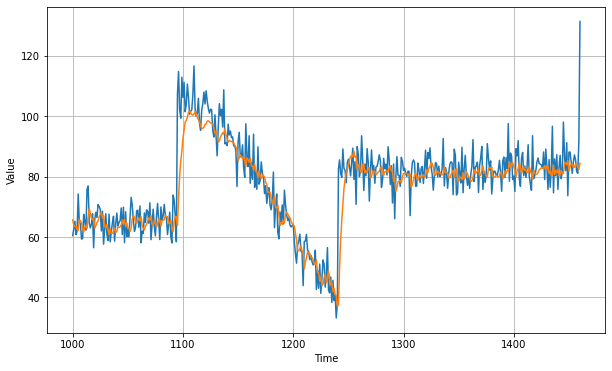

In [91]:
# forecasting the results 
forecast = []
results = [] 

for time in range(len(series)- window_size): #prediction for entire time series
    forecast.append(model.predict(series[time: time + window_size][np.newaxis]))
    #, numpy.newaxis is used to increase the dimension of the existing array by one more dimension,
forecast = forecast[split_value - window_size :]
results = np.array(forecast)[:, 0, 0 ]

plt.figure(figsize=(10, 6))

plot_series(validation_time, validation_data)
plot_series(validation_time, results)
plt.show()

In [94]:
tf.keras.metrics.mean_absolute_error(validation_data, results).numpy()

5.082032

In [97]:
#a lot better than before

In [98]:
#add a convolution

In [110]:
shuffle_size = shuffle_buffer


def windowed_function1(series, window_size, shuffle_size, batch_size):
    #in case if convolution will be the first layer then we need to add one more diemension to the nextwork for lstm to process
    series = tf.expand_dims(series, axis = -1)
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size+ 1, shift = 1, drop_remainder= True)
    dataset = dataset.flat_map(lambda x: x.batch(window_size+1))
    dataset = dataset.shuffle(shuffle_size).map(lambda x : (x[:-1],x[-1]))
    dataset = dataset.batch(32).prefetch(1)
    return dataset



In [111]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

dataset = windowed_function1(train_data, window_size=30, shuffle_size= shuffle_size, batch_size= 128)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Dense(1 , activation = 'relu'), 
    tf.keras.layers.Lambda(lambda x: x*200)
    
])

lr_callback = tf.keras.callbacks.LearningRateScheduler(
lambda x: 1e-8 *(10**(x/20)))
optimizer = tf.keras.optimizers.SGD(lr = 1e-8 , momentum=0.9)

model.compile(optimizer = optimizer, loss = tf.keras.losses.Huber(), metrics = ['mae'])

history1 = model.fit(dataset, epochs =100, callbacks= [lr_callback])


Epoch 1/100
14/14 [==============================] - 5s 23ms/step - loss: 73.5005 - mae: 74.0004
Epoch 2/100
14/14 [==============================] - 0s 18ms/step - loss: 73.4688 - mae: 73.9687
Epoch 3/100
14/14 [==============================] - 0s 18ms/step - loss: 73.4241 - mae: 73.9241
Epoch 4/100
14/14 [==============================] - 0s 18ms/step - loss: 73.3713 - mae: 73.8712
Epoch 5/100
14/14 [==============================] - 0s 19ms/step - loss: 73.3107 - mae: 73.8107
Epoch 6/100
14/14 [==============================] - 0s 18ms/step - loss: 73.2431 - mae: 73.7431
Epoch 7/100
14/14 [==============================] - 0s 22ms/step - loss: 73.1661 - mae: 73.6660
Epoch 8/100
14/14 [==============================] - 0s 18ms/step - loss: 73.0787 - mae: 73.5787
Epoch 9/100
14/14 [==============================] - 0s 18ms/step - loss: 72.9806 - mae: 73.4806
Epoch 10/100
14/14 [==============================] - 0s 19ms/step - loss: 72.8687 - mae: 73.3685
Epoch 11/100
14/14 [=========

14/14 [==============================] - 0s 22ms/step - loss: 18.9471 - mae: 19.4421
Epoch 86/100
14/14 [==============================] - 0s 22ms/step - loss: 14.8706 - mae: 15.3649
Epoch 87/100
14/14 [==============================] - 0s 22ms/step - loss: 11.6571 - mae: 12.1480
Epoch 88/100
14/14 [==============================] - 0s 22ms/step - loss: 17.1760 - mae: 17.6696
Epoch 89/100
14/14 [==============================] - 0s 22ms/step - loss: 16.3894 - mae: 16.8802
Epoch 90/100
14/14 [==============================] - 0s 21ms/step - loss: 26.2655 - mae: 26.7620
Epoch 91/100
14/14 [==============================] - 0s 21ms/step - loss: 21.6311 - mae: 22.1283
Epoch 92/100
14/14 [==============================] - 0s 21ms/step - loss: 16.4181 - mae: 16.9090
Epoch 93/100
14/14 [==============================] - 0s 21ms/step - loss: 17.6234 - mae: 18.1166
Epoch 94/100
14/14 [==============================] - 0s 21ms/step - loss: 14.0967 - mae: 14.5913
Epoch 95/100
14/14 [=============

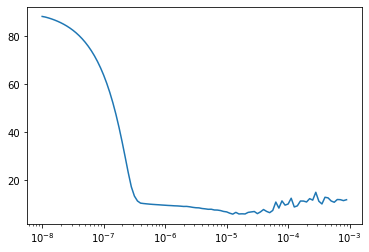

In [114]:
plt.semilogx(history.history['lr'], history.history['loss'])
plt.show()

In [135]:
#optimal value is 1e-5
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

dataset = windowed_function1(train_data, window_size=30, shuffle_size= shuffle_size, batch_size= 128)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True)),
    tf.keras.layers.Dense(1 , activation = 'relu'), 
    tf.keras.layers.Lambda(lambda x: x*200)
    
])


optimizer = tf.keras.optimizers.SGD(lr = 2e-6 , momentum=0.9)

model.compile(optimizer = optimizer, loss = tf.keras.losses.Huber(), metrics = ['mae'])

history1 = model.fit(dataset, epochs =500)


Epoch 1/500
14/14 [==============================] - 7s 22ms/step - loss: 77.5608 - mae: 78.0608
Epoch 2/500
14/14 [==============================] - 0s 21ms/step - loss: 76.0251 - mae: 76.5251
Epoch 3/500
14/14 [==============================] - 0s 20ms/step - loss: 71.6286 - mae: 72.1282
Epoch 4/500
14/14 [==============================] - 0s 20ms/step - loss: 62.0894 - mae: 62.5884
Epoch 5/500
14/14 [==============================] - 0s 20ms/step - loss: 24.2850 - mae: 24.7799
Epoch 6/500
14/14 [==============================] - 0s 20ms/step - loss: 13.9674 - mae: 14.4596
Epoch 7/500
14/14 [==============================] - 0s 20ms/step - loss: 11.3618 - mae: 11.8516
Epoch 8/500
14/14 [==============================] - 0s 21ms/step - loss: 10.3093 - mae: 10.7990
Epoch 9/500
14/14 [==============================] - 0s 21ms/step - loss: 8.9165 - mae: 9.4039
Epoch 10/500
14/14 [==============================] - 0s 20ms/step - loss: 8.0751 - mae: 8.5585
Epoch 11/500
14/14 [=============

14/14 [==============================] - 0s 25ms/step - loss: 5.1874 - mae: 5.6649
Epoch 87/500
14/14 [==============================] - 0s 25ms/step - loss: 5.2681 - mae: 5.7469
Epoch 88/500
14/14 [==============================] - 0s 27ms/step - loss: 5.2696 - mae: 5.7487
Epoch 89/500
14/14 [==============================] - 0s 25ms/step - loss: 5.4873 - mae: 5.9649
Epoch 90/500
14/14 [==============================] - 0s 24ms/step - loss: 5.3603 - mae: 5.8409
Epoch 91/500
14/14 [==============================] - 0s 28ms/step - loss: 5.2589 - mae: 5.7390
Epoch 92/500
14/14 [==============================] - 0s 30ms/step - loss: 5.4921 - mae: 5.9725
Epoch 93/500
14/14 [==============================] - 0s 27ms/step - loss: 5.3523 - mae: 5.8301
Epoch 94/500
14/14 [==============================] - 0s 28ms/step - loss: 5.2319 - mae: 5.7114
Epoch 95/500
14/14 [==============================] - 0s 26ms/step - loss: 5.1460 - mae: 5.6262
Epoch 96/500
14/14 [==============================] -

14/14 [==============================] - 0s 23ms/step - loss: 4.9441 - mae: 5.4252
Epoch 171/500
14/14 [==============================] - 0s 26ms/step - loss: 4.8596 - mae: 5.3365
Epoch 172/500
14/14 [==============================] - 0s 25ms/step - loss: 4.8497 - mae: 5.3302
Epoch 173/500
14/14 [==============================] - 0s 24ms/step - loss: 4.8469 - mae: 5.3258
Epoch 174/500
14/14 [==============================] - 0s 25ms/step - loss: 4.8124 - mae: 5.2904
Epoch 175/500
14/14 [==============================] - 0s 23ms/step - loss: 4.9892 - mae: 5.4697
Epoch 176/500
14/14 [==============================] - 0s 24ms/step - loss: 4.8301 - mae: 5.3102
Epoch 177/500
14/14 [==============================] - 0s 25ms/step - loss: 4.8140 - mae: 5.2921
Epoch 178/500
14/14 [==============================] - 0s 23ms/step - loss: 4.9547 - mae: 5.4359
Epoch 179/500
14/14 [==============================] - 0s 25ms/step - loss: 5.3508 - mae: 5.8321
Epoch 180/500
14/14 [=======================

14/14 [==============================] - 0s 22ms/step - loss: 4.7870 - mae: 5.2659
Epoch 255/500
14/14 [==============================] - 0s 23ms/step - loss: 4.6855 - mae: 5.1649
Epoch 256/500
14/14 [==============================] - 0s 23ms/step - loss: 4.6685 - mae: 5.1457
Epoch 257/500
14/14 [==============================] - 0s 24ms/step - loss: 4.7153 - mae: 5.1960
Epoch 258/500
14/14 [==============================] - 0s 23ms/step - loss: 4.8847 - mae: 5.3600
Epoch 259/500
14/14 [==============================] - 0s 25ms/step - loss: 4.8050 - mae: 5.2840
Epoch 260/500
14/14 [==============================] - 0s 23ms/step - loss: 5.2347 - mae: 5.7160
Epoch 261/500
14/14 [==============================] - 0s 23ms/step - loss: 4.7262 - mae: 5.2019
Epoch 262/500
14/14 [==============================] - 0s 24ms/step - loss: 4.8186 - mae: 5.3004
Epoch 263/500
14/14 [==============================] - 0s 22ms/step - loss: 4.6532 - mae: 5.1312
Epoch 264/500
14/14 [=======================

14/14 [==============================] - 0s 27ms/step - loss: 4.6282 - mae: 5.1049
Epoch 339/500
14/14 [==============================] - 0s 25ms/step - loss: 4.5785 - mae: 5.0553
Epoch 340/500
14/14 [==============================] - 0s 24ms/step - loss: 4.7638 - mae: 5.2431
Epoch 341/500
14/14 [==============================] - 0s 28ms/step - loss: 4.5463 - mae: 5.0263
Epoch 342/500
14/14 [==============================] - 0s 25ms/step - loss: 4.5336 - mae: 5.0126
Epoch 343/500
14/14 [==============================] - 0s 31ms/step - loss: 4.7427 - mae: 5.2214
Epoch 344/500
14/14 [==============================] - 0s 27ms/step - loss: 4.5223 - mae: 4.9995
Epoch 345/500
14/14 [==============================] - 0s 26ms/step - loss: 4.7311 - mae: 5.2102
Epoch 346/500
14/14 [==============================] - 0s 25ms/step - loss: 4.9247 - mae: 5.4045
Epoch 347/500
14/14 [==============================] - 0s 25ms/step - loss: 4.8432 - mae: 5.3202
Epoch 348/500
14/14 [=======================

14/14 [==============================] - 0s 22ms/step - loss: 4.6454 - mae: 5.1221
Epoch 423/500
14/14 [==============================] - 0s 23ms/step - loss: 4.7337 - mae: 5.2090
Epoch 424/500
14/14 [==============================] - 0s 23ms/step - loss: 4.6621 - mae: 5.1399
Epoch 425/500
14/14 [==============================] - 0s 25ms/step - loss: 4.5043 - mae: 4.9831
Epoch 426/500
14/14 [==============================] - 0s 24ms/step - loss: 4.6960 - mae: 5.1725
Epoch 427/500
14/14 [==============================] - 0s 23ms/step - loss: 4.4405 - mae: 4.9159
Epoch 428/500
14/14 [==============================] - 0s 22ms/step - loss: 4.5673 - mae: 5.0456
Epoch 429/500
14/14 [==============================] - 0s 21ms/step - loss: 4.5371 - mae: 5.0140
Epoch 430/500
14/14 [==============================] - 0s 25ms/step - loss: 4.4577 - mae: 4.9341
Epoch 431/500
14/14 [==============================] - 0s 21ms/step - loss: 4.4073 - mae: 4.8842
Epoch 432/500
14/14 [=======================

In [126]:
# forecasting the results 
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast


In [128]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_value - window_size:-1, -1, 0]

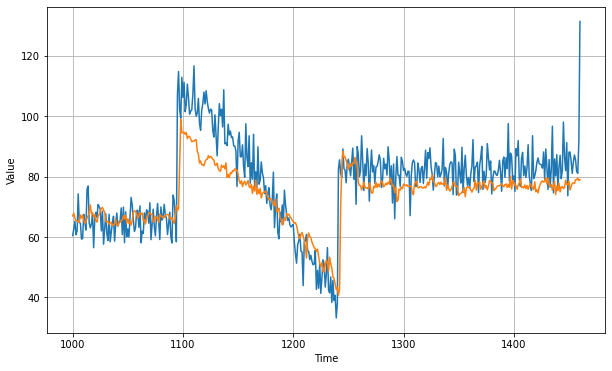

In [129]:
plt.figure(figsize=(10, 6))
plot_series(validation_time, validation_data)
plot_series(validation_time, rnn_forecast)

In [131]:
tf.keras.metrics.mean_absolute_error(validation_data, rnn_forecast).numpy()

7.0291586

# Sunspots.csv 

downlaoda the data from https://drive.google.com/uc?id=1bLnqPgwoSh6rHz_DKDdDeQyAyl8_nqT5

In [136]:
import csv 
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

In [137]:
import os 

In [138]:
os.chdir("/Users/avinashtripathi/Downloads") 

In [139]:
pwd

'/Users/avinashtripathi/Downloads'

In [175]:
sunspots = []
time= []

with open ('Sunspots.csv', 'r') as f:
    file = csv.reader(f)
    next(file)
    for f in file: 
        sunspots.append(float(f[2])) 
        time.append(int(f[0]))
print(len(time))
print(len(sunspots))
print(sunspots)
print(time)

series = np.array(sunspots)
time = np.array(time_step)


3235
3235
[96.7, 104.3, 116.7, 92.8, 141.7, 139.2, 158.0, 110.5, 126.5, 125.8, 264.3, 142.0, 122.2, 126.5, 148.7, 147.2, 150.0, 166.7, 142.3, 171.7, 152.0, 109.5, 105.5, 125.7, 116.7, 72.5, 75.5, 94.0, 101.2, 84.5, 110.5, 99.7, 39.2, 38.7, 47.5, 73.3, 58.3, 83.3, 118.3, 98.8, 99.5, 66.0, 130.7, 48.8, 45.2, 77.7, 62.7, 66.7, 73.3, 53.3, 76.2, 63.3, 60.0, 52.8, 36.7, 65.0, 46.7, 41.7, 33.3, 11.2, 0.0, 5.0, 2.8, 22.8, 34.5, 44.5, 31.3, 20.5, 13.7, 40.2, 22.0, 7.0, 17.0, 18.7, 11.3, 10.8, 0.0, 0.0, 14.3, 5.3, 29.7, 39.5, 11.3, 33.3, 20.8, 11.8, 9.0, 15.7, 20.8, 21.5, 6.0, 10.7, 19.7, 23.8, 28.3, 15.7, 23.5, 35.3, 43.7, 50.0, 63.5, 21.3, 41.7, 85.5, 66.2, 54.2, 107.8, 55.8, 62.7, 86.7, 81.7, 120.5, 77.3, 75.0, 73.3, 64.5, 104.2, 62.8, 71.7, 71.7, 80.5, 73.3, 78.0, 78.3, 81.7, 83.3, 85.0, 118.8, 128.7, 99.5, 77.2, 95.0, 112.2, 99.2, 124.5, 97.2, 120.0, 80.5, 110.0, 126.0, 102.2, 84.3, 99.5, 101.7, 116.7, 151.7, 134.5, 119.5, 178.7, 165.5, 156.8, 151.8, 167.8, 147.8, 149.5, 76.7, 73.0, 121.3,

NameError: name 'time_step' is not defined

In [176]:
# create a print function 
def plot_series(time , series, format ='-', start = 0, end = None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel('Time')
    plt.ylabel('Total sunspots')
    plt.grid("True")
    

In [185]:
#create a window function
def window_function_ss(series, window_size, batch_size , shuffle_size):
    series = tf.expand_dims(series , axis =-1)
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size +1 ,shift =1, drop_remainder= True)
    dataset = dataset.flat_map(lambda x: x.batch(window_size+1))
    dataset = dataset.shuffle(shuffle_size).map(lambda x: (x[:-1], x[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset 

In [178]:
#splitting the data and tuning hyper parameters 
split_value = 3000


train_time = time[:split_value]
train_value = series[:split_value]
val_time = time[split_value:]
val_value =  series[split_value:]

window_size = 60
batch_size = 32
shuffle_size = 1000

In [179]:
train_set = window_function_ss(train_value, window_size, batch_size, shuffle_size )

#model architecture 

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20,input_shape =[window_size], activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(1)
])

#lr_callback = tf.keras.callbacks.LearningRateScheduler()
optimizer = tf.keras.optimizers.SGD(lr = 1e-7, momentum=0.9)
model.compile(loss ='mse' , optimizer= optimizer)

model.fit(train_set, epochs = 100 )

/Applications/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
92/92 [==============================] - 1s 3ms/step - loss: 1840.8838
Epoch 2/100
92/92 [==============================] - 0s 3ms/step - loss: 1223.0758
Epoch 3/100
92/92 [==============================] - 0s 3ms/step - loss: 1038.2366
Epoch 4/100
92/92 [==============================] - 0s 3ms/step - loss: 950.6160
Epoch 5/100
92/92 [==============================] - 0s 3ms/step - loss: 880.8947
Epoch 6/100
92/92 [==============================] - 0s 3ms/step - loss: 835.8604
Epoch 7/100
92/92 [==============================] - 0s 3ms/step - loss: 803.1484
Epoch 8/100
92/92 [==============================] - 0s 3ms/step - loss: 786.6620
Epoch 9/100
92/92 [==============================] - 0s 3ms/step - loss: 756.8843
Epoch 10/100
92/92 [==============================] - 0s 3ms/step - loss: 742.1887
Epoch 11/100
92/92 [==============================] - 0s 3ms/step - loss: 718.0330
Epoch 12/100
92/92 [==============================] - 0s 3ms/step - loss: 716.5132
Epoch 13/1

92/92 [==============================] - 0s 3ms/step - loss: 574.4845
Epoch 100/100
92/92 [==============================] - 0s 3ms/step - loss: 572.4995


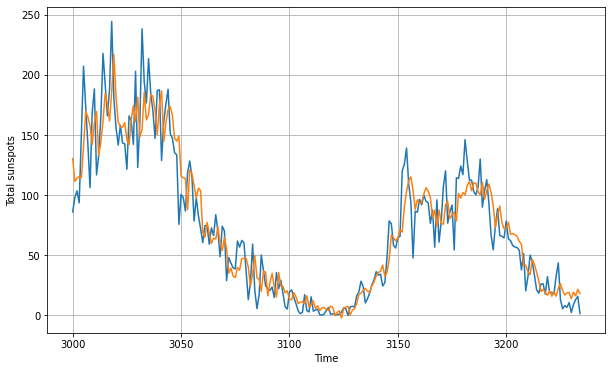

In [180]:
forecast = []

for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time+ window_size][np.newaxis]))

forecast = forecast[split_value-window_size:]
results = np.array(forecast)[:, 0, 0]

plt.figure(figsize =(10,6))

plot_series(val_time, val_value)
plot_series(val_time, results)

In [181]:

tf.keras.metrics.mean_absolute_error(val_value, results).numpy()#simple DNN model 

15.138967

In [190]:
#trying out LSTMS and moderating the learning rate of the model 
train_set = window_function_ss(train_value, window_size, batch_size, shuffle_size )

#model architecture 

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Dense(20,input_shape =[window_size], activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x*100.0)
])

lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-7*(10**(x/20)))
optimizer = tf.keras.optimizers.SGD(lr = 1e-7, momentum=0.9)
model.compile(loss =tf.keras.losses.Huber() , optimizer= optimizer, metrics = ['mae'])

history = model.fit(train_set, epochs = 100 , verbose = 2, callbacks= [lr_callback])

Epoch 1/100
92/92 - 12s - loss: 63.8649 - mae: 64.3612
Epoch 2/100
92/92 - 5s - loss: 55.2329 - mae: 55.7303
Epoch 3/100
92/92 - 6s - loss: 52.3150 - mae: 52.8126
Epoch 4/100
92/92 - 5s - loss: 50.6413 - mae: 51.1391
Epoch 5/100
92/92 - 5s - loss: 49.2955 - mae: 49.7932
Epoch 6/100
92/92 - 5s - loss: 48.0595 - mae: 48.5572
Epoch 7/100
92/92 - 5s - loss: 46.7814 - mae: 47.2790
Epoch 8/100
92/92 - 5s - loss: 45.5366 - mae: 46.0339
Epoch 9/100
92/92 - 5s - loss: 44.2550 - mae: 44.7524
Epoch 10/100
92/92 - 6s - loss: 42.6056 - mae: 43.1028
Epoch 11/100
92/92 - 5s - loss: 41.0468 - mae: 41.5439
Epoch 12/100
92/92 - 5s - loss: 39.6174 - mae: 40.1142
Epoch 13/100
92/92 - 5s - loss: 38.5190 - mae: 39.0155
Epoch 14/100
92/92 - 5s - loss: 37.4603 - mae: 37.9566
Epoch 15/100
92/92 - 5s - loss: 36.4894 - mae: 36.9857
Epoch 16/100
92/92 - 6s - loss: 35.7229 - mae: 36.2190
Epoch 17/100
92/92 - 6s - loss: 34.5566 - mae: 35.0525
Epoch 18/100
92/92 - 7s - loss: 33.6462 - mae: 34.1417
Epoch 19/100
92/92

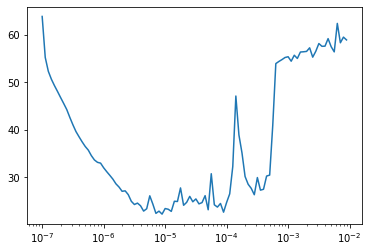

In [192]:
plt.semilogx(history.history['lr'], history.history['loss'])
plt.show()